# Import Library & Input files

In [ ]:
!pip install standard_precip
!pip install pyet
!pip install pmdarima
!pip install openpyxl
!pip install pywavelets tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima.arima import auto_arima
from standard_precip import spi
import pickle
import pyet as pyet
import matplotlib.pyplot as plt
from standard_precip import spi
import openpyxl

# Set Directory for inputs & outputs

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Define the base directory
base_dir = r"/content/drive/MyDrive/CDI03 code"
My_dir = base_dir

# Create directories for different outputs
output_dir = os.path.join(base_dir, "Output")
sav_dif_dir = os.path.join(base_dir, "SAV DIF Outputs")
spei_dir = os.path.join(sav_dif_dir, "SPEI")

# Check if directories exist, if not, create them
for directory in [output_dir, sav_dif_dir, spei_dir]:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# Read rainfall data for SPI
spi_ = pd.read_excel(os.path.join(My_dir, 'Input', 'Rajshahi_spi.xlsx'))

In [ ]:
import os
import numpy as np
import pandas as pd
# Define the base directory
base_dir = r"/content/drive/MyDrive/CDI03 code"
My_dir = base_dir

# Create directories for different outputs
output_dir = os.path.join(base_dir, "Output")
sav_dif_dir = os.path.join(base_dir, "SAV DIF Outputs")
spei_dir = os.path.join(sav_dif_dir, "SPEI")

# Check if directories exist, if not, create them
for directory in [output_dir, sav_dif_dir, spei_dir]:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# Read rainfall data for SPI calculation
spi_ = pd.read_excel(os.path.join(My_dir, 'Input', 'Rajshahi_spi.xlsx'))

# Create a copy of the data for manipulation
DF1 = spi_.copy()

# Clean the data by replacing 'MSD' with NaN (if any missing values exist)
DF1 = DF1.replace('MSD', np.nan)

# SPI calculation portion
spi_rain = spi.SPI()  # Calling spi module for SPI calculation
station = DF1[['Date', 'Rainfall']]  # Select relevant data columns

# Ensure 'Date' column is in datetime format
station['Date'] = pd.to_datetime(station['Date'])

# Calculate SPI1 (1-month SPI)
sp1 = station.copy()
sp1['Year-Month'] = sp1['Date'].dt.strftime('%Y-%m')  # Extract year and month
sp1 = sp1.groupby('Year-Month')['Rainfall'].sum().reset_index()  # Monthly aggregation
sp1 = spi_rain.calculate(sp1, 'Year-Month', 'Rainfall', freq="M", scale=1, fit_type="lmom", dist_type="gam")  # SPI1 Calculation
SPI1 = sp1.rename(columns={sp1.columns[2]: 'SPI1'})  # Rename the SPI1 column

# Calculate SPI3 (3-month SPI)
sp3 = station.copy()
sp3['Year-Month'] = sp3['Date'].dt.strftime('%Y-%m')
sp3 = sp3.groupby('Year-Month')['Rainfall'].sum().reset_index()
sp3 = spi_rain.calculate(sp3, 'Year-Month', 'Rainfall', freq="M", scale=3, fit_type="lmom", dist_type="gam")  # SPI3 Calculation
SPI3 = sp3.rename(columns={sp3.columns[2]: 'SPI3'})  # Rename the SPI3 column

# Calculate SPI6 (6-month SPI)
sp6 = station.copy()
sp6['Year-Month'] = sp6['Date'].dt.strftime('%Y-%m')
sp6 = sp6.groupby('Year-Month')['Rainfall'].sum().reset_index()
sp6 = spi_rain.calculate(sp6, 'Year-Month', 'Rainfall', freq="M", scale=6, fit_type="lmom", dist_type="gam")  # SPI6 Calculation
SPI6 = sp6.rename(columns={sp6.columns[2]: 'SPI6'})  # Rename the SPI6 column

# Calculate SPI12 (12-month SPI)
sp12 = station.copy()
sp12['Year-Month'] = sp12['Date'].dt.strftime('%Y-%m')
sp12 = sp12.groupby('Year-Month')['Rainfall'].sum().reset_index()
sp12 = spi_rain.calculate(sp12, 'Year-Month', 'Rainfall', freq="M", scale=12, fit_type="lmom", dist_type="gam")  # SPI12 Calculation
SPI12 = sp12.rename(columns={sp12.columns[2]: 'SPI12'})  # Rename the SPI12 column

# Combine all SPI values into a single DataFrame
SPI_Data = pd.concat([SPI1[['Year-Month', 'SPI1']], SPI3[['SPI3']], SPI6[['SPI6']], SPI12[['SPI12']]], axis=1)

# Ensure 'Date' column is in datetime format and set frequency
SPI_Data['Date'] = pd.to_datetime(SPI_Data['Year-Month'])
SPI_Data = SPI_Data.set_index('Date')
SPI_Data.index = SPI_Data.index.to_period('M').to_timestamp()

# Save the final SPI data to a CSV file in the output directory
output_file = os.path.join(output_dir, "SPI_Calculated_Data.csv")
SPI_Data.to_csv(output_file)

# Print success message
print(f"SPI calculation completed and saved to {output_file}")

<ipython-input-5-07bcb05e6d74>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF1 = DF1.replace('MSD', np.nan)


SPI calculation completed and saved to /content/drive/MyDrive/CDI03 code/Output/SPI_Calculated_Data.csv


# Fitting ML and DL algorithms

In [ ]:
!pip install bayesian-optimization

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


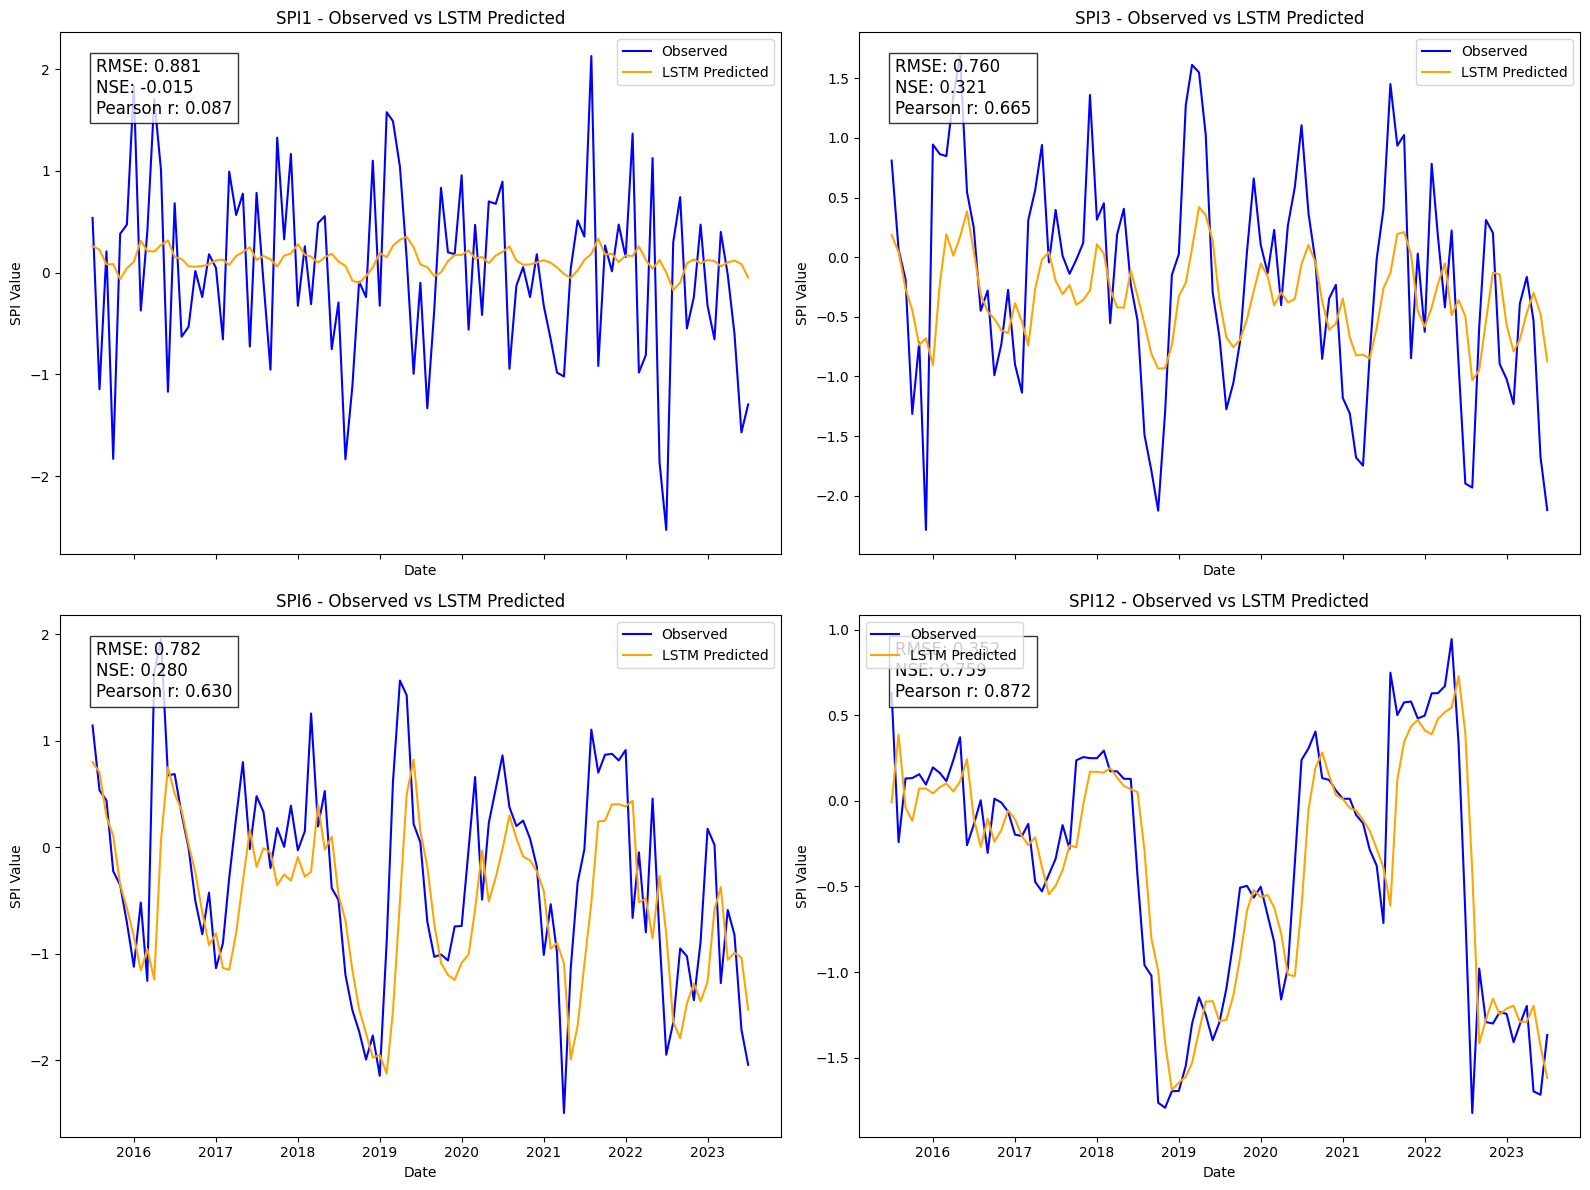

In [ ]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# Function to calculate NSE
def calculate_nse(observed, simulated):
    mean_observed = np.mean(observed)
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - mean_observed) ** 2))

# Ensure 'Date' column is in datetime format and set frequency
SPI_Data['Date'] = pd.to_datetime(SPI_Data['Year-Month'])
SPI_Data = SPI_Data.set_index('Date')
SPI_Data.index = SPI_Data.index.to_period('M').to_timestamp()

# Remove rows with missing data
SPI_ARIMA = SPI_Data.dropna()

# Scaling data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(SPI_ARIMA[['SPI1', 'SPI3', 'SPI6', 'SPI12']])

# Train/test split
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Define look_back
look_back = 3

# Prepare dataset for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Function to create and fit LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Train and fit LSTM for each SPI index
lstm_models = {}
for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    # Create training datasets
    X_train, y_train = create_dataset(train[:, i:i+1], look_back)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Create LSTM model
    model = create_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=50, verbose=0)

    # Save the trained model
    lstm_models[spi] = model
    pickle.dump(model, open(f'{spi}_LSTM_Model.sav', 'wb'))

# Load LSTM models if required
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    model_path = f'{spi}_LSTM_Model.sav'
    if os.path.isfile(model_path):
        lstm_models[spi] = pickle.load(open(model_path, 'rb'))

# ----------------- Forecasting using LSTM Model --------------------
lstm_predictions = {}
metrics = {}  # To store error metrics

for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    X_test, y_test = create_dataset(test[:, i:i+1], look_back)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Predict using LSTM model
    lstm_pred = lstm_models[spi].predict(X_test)
    lstm_pred = lstm_pred.reshape(-1, 1)

    # Reverse scaling
    lstm_pred_inverse = scaler.inverse_transform(
        np.concatenate((lstm_pred, np.zeros((lstm_pred.shape[0], 3))), axis=1)
    )[:, 0]

    # Save predictions
    lstm_predictions[spi] = lstm_pred_inverse

    # Calculate error metrics
    test_observed = SPI_ARIMA[spi].dropna()[-len(lstm_pred_inverse):]

    rmse = np.sqrt(mean_squared_error(test_observed, lstm_pred_inverse))
    nse = calculate_nse(test_observed.values, lstm_pred_inverse)
    pearson_r, _ = pearsonr(test_observed.values, lstm_pred_inverse)

    # Store metrics
    metrics[spi] = {'RMSE': rmse, 'NSE': nse, 'Pearson r': pearson_r}

# ----------------- Plotting Observed vs Predicted with Error Metrics --------------------
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
axs = axs.flatten()

for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    observed = SPI_ARIMA[spi].dropna()
    test_observed = observed[-len(lstm_predictions[spi]):]

    ax = axs[i]

    ax.plot(test_observed.index, test_observed, label='Observed', color='blue')
    ax.plot(test_observed.index, lstm_predictions[spi], label='LSTM Predicted', color='orange')

    # Display error metrics
    rmse = metrics[spi]['RMSE']
    nse = metrics[spi]['NSE']
    pearson_r = metrics[spi]['Pearson r']

    textstr = (f'RMSE: {rmse:.3f}\n'
               f'NSE: {nse:.3f}\n'
               f'Pearson r: {pearson_r:.3f}')

    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    ax.set_title(f'{spi} - Observed vs LSTM Predicted')
    ax.set_xlabel('Date')
    ax.set_ylabel('SPI Value')
    ax.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


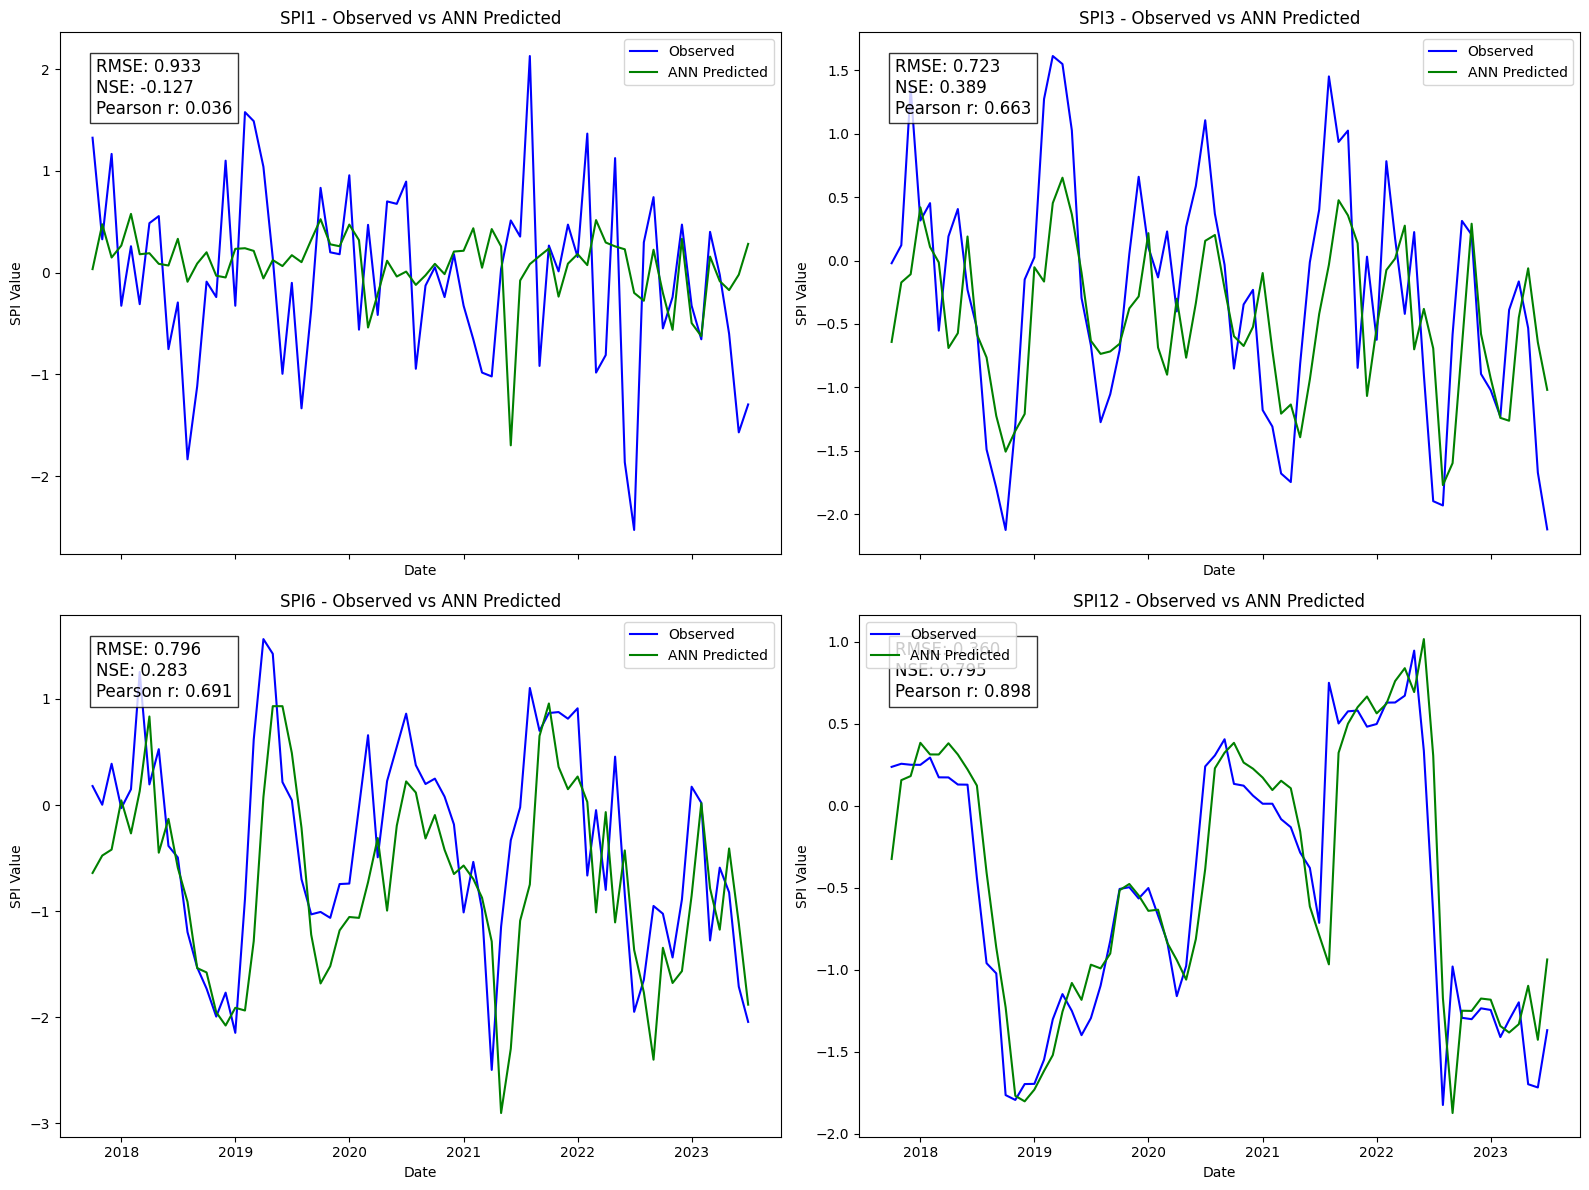

In [ ]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# Function to calculate NSE
def calculate_nse(observed, simulated):
    mean_observed = np.mean(observed)
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - mean_observed) ** 2))

# Ensure 'Date' column is in datetime format and set frequency
SPI_Data['Date'] = pd.to_datetime(SPI_Data['Year-Month'])
SPI_Data = SPI_Data.set_index('Date')
SPI_Data.index = SPI_Data.index.to_period('M').to_timestamp()

# Remove rows with missing data
SPI_ARIMA = SPI_Data.dropna()

# Scaling data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(SPI_ARIMA[['SPI1', 'SPI3', 'SPI6', 'SPI12']])

# Train/test split
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Define input size (30 nodes, to match the 30-8-1 model)
input_size = 30

# Prepare dataset for ANN (feedforward neural network)
def create_ann_dataset(data, input_size=30):
    X, Y = [], []
    for i in range(len(data) - input_size):
        X.append(data[i:(i + input_size), 0])  # Taking first feature (SPI1) as an example
        Y.append(data[i + input_size, 0])
    return np.array(X), np.array(Y)

# Function to create and fit ANN model
def create_ann_model(input_shape):
    model = Sequential()
    model.add(Dense(8, input_dim=input_shape, activation='relu'))  # 30 input, 8 hidden neurons
    model.add(Dense(1))  # 1 output neuron
    model.compile(optimizer='adam', loss='mse')
    return model

# Train and fit ANN for each SPI index
ann_models = {}
for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    # Create training datasets
    X_train, y_train = create_ann_dataset(train[:, i:i+1], input_size)

    # Create ANN model
    model = create_ann_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=500, verbose=0)

    # Save the trained model
    ann_models[spi] = model
    pickle.dump(model, open(f'{spi}_ANN_Model.sav', 'wb'))

# Load ANN models if required
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    model_path = f'{spi}_ANN_Model.sav'
    if os.path.isfile(model_path):
        ann_models[spi] = pickle.load(open(model_path, 'rb'))

# ----------------- Forecasting using ANN Model --------------------
ann_predictions = {}
metrics = {}

for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    X_test, y_test = create_ann_dataset(test[:, i:i+1], input_size)

    # Predict using ANN model
    ann_pred = ann_models[spi].predict(X_test)
    ann_pred = ann_pred.reshape(-1, 1)

    # Reverse scaling
    ann_pred_inverse = scaler.inverse_transform(
        np.concatenate((ann_pred, np.zeros((ann_pred.shape[0], 3))), axis=1)
    )[:, 0]

    # Save predictions
    ann_predictions[spi] = ann_pred_inverse

    # Calculate error metrics
    test_observed = SPI_ARIMA[spi].dropna()[-len(ann_pred_inverse):]

    rmse = np.sqrt(mean_squared_error(test_observed, ann_pred_inverse))
    nse = calculate_nse(test_observed.values, ann_pred_inverse)
    pearson_r, _ = pearsonr(test_observed.values, ann_pred_inverse)

    # Store metrics
    metrics[spi] = {'RMSE': rmse, 'NSE': nse, 'Pearson r': pearson_r}

# ----------------- Plotting Observed vs Predicted with Error Metrics --------------------
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
axs = axs.flatten()

for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    observed = SPI_ARIMA[spi].dropna()
    test_observed = observed[-len(ann_predictions[spi]):]

    ax = axs[i]

    ax.plot(test_observed.index, test_observed, label='Observed', color='blue')
    ax.plot(test_observed.index, ann_predictions[spi], label='ANN Predicted', color='green')

    # Display error metrics
    rmse = metrics[spi]['RMSE']
    nse = metrics[spi]['NSE']
    pearson_r = metrics[spi]['Pearson r']

    textstr = (f'RMSE: {rmse:.3f}\n'
               f'NSE: {nse:.3f}\n'
               f'Pearson r: {pearson_r:.3f}')

    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    ax.set_title(f'{spi} - Observed vs ANN Predicted')
    ax.set_xlabel('Date')
    ax.set_ylabel('SPI Value')
    ax.legend()

plt.tight_layout()
plt.show()


Epoch 1/4000
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 337ms/step - loss: 1126218.7500 - learning_rate: 7.0000
Epoch 2/4000
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - loss: 315.4890 - learning_rate: 7.0000
Epoch 3/4000
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - loss: 249.4539 - learning_rate: 7.0000
Epoch 4/4000
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 165.5145 - learning_rate: 7.0000
Epoch 5/4000
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - loss: 106.1706 - learning_rate: 7.0000
Epoch 6/4000
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 266ms/step - loss: 89.0952 - learning_rate: 7.0000
Epoch 7/4000
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 66.9019 - learning_rate: 7.0000
Epoch 8/4000
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - loss: 72.6331 - learning_rate: 7.0000
Epoch 9/4000
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 271ms/step - loss: 60.4171 - learning_rate: 7.0000
Epoch 10/4000
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - loss: 54.0541 - learning_rate: 7.0000
Epoch 11/4000
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms

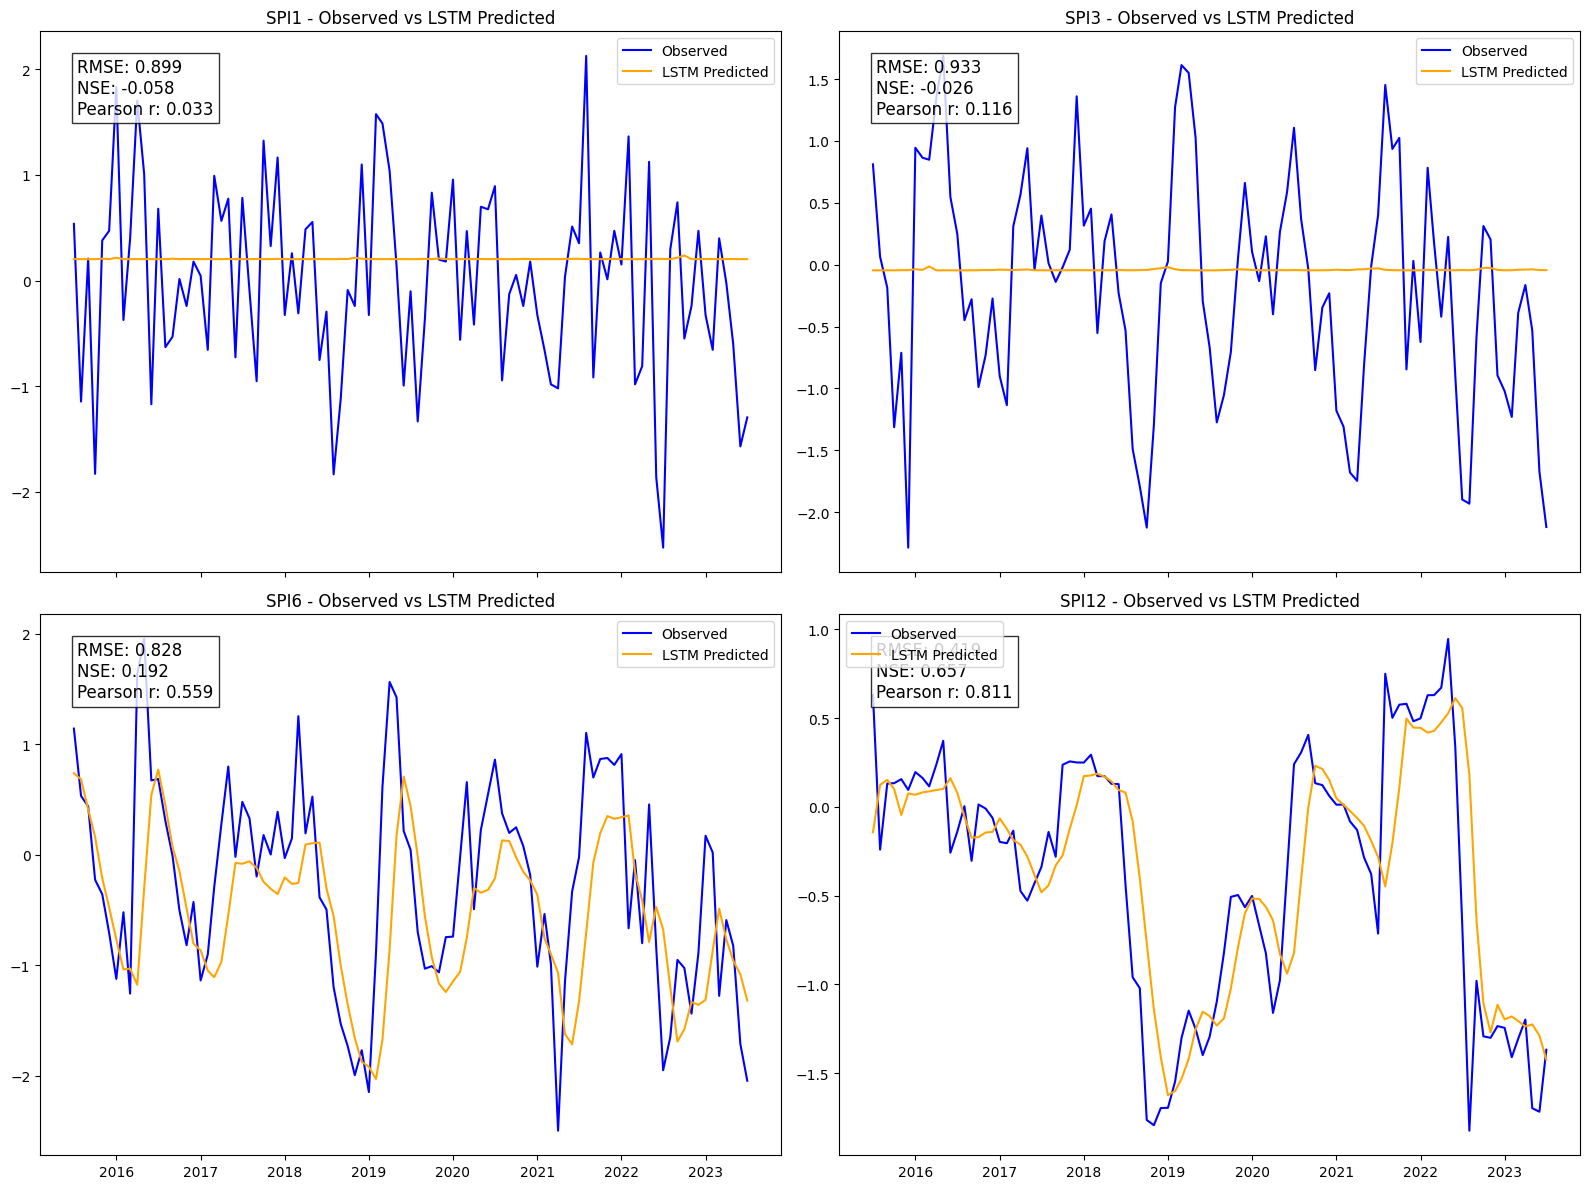

In [ ]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.optimizers import Adagrad, RMSprop
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Function to calculate NSE
def calculate_nse(observed, simulated):
    mean_observed = np.mean(observed)
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - mean_observed) ** 2))

# Ensure 'Date' column is in datetime format and set frequency
SPI_Data['Date'] = pd.to_datetime(SPI_Data['Year-Month'])
SPI_Data = SPI_Data.set_index('Date')
SPI_Data.index = SPI_Data.index.to_period('M').to_timestamp()

# Remove rows with missing data
SPI_ARIMA = SPI_Data.dropna()

# Scaling data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(SPI_ARIMA[['SPI1', 'SPI3', 'SPI6', 'SPI12']])

# Train/test split
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Define look_back
look_back = 3

# Prepare dataset for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Univariate LSTM model (SPI values only)
def create_univariate_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(1024, activation='tanh', return_sequences=False))
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(1))
    optimizer = Adagrad(learning_rate=7.0)  # AdaGrad optimizer
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Complex LSTM model (for multivariate inputs)
def create_complex_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(512, activation='tanh', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(512, activation='tanh', return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    optimizer = RMSprop(learning_rate=0.001)  # RMSProp optimizer
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='loss', patience=50, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1)

# Train and fit LSTM for each SPI index
lstm_models = {}
for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    # Create training datasets
    X_train, y_train = create_dataset(train[:, i:i+1], look_back)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Create LSTM model (choose architecture based on the complexity of data)
    if i < 2:  # Use univariate LSTM model for SPI1 and SPI3
        model = create_univariate_lstm_model((X_train.shape[1], 1))
    else:  # Use complex LSTM model for SPI6 and SPI12
        model = create_complex_lstm_model((X_train.shape[1], 1))

    # Fit the model
    model.fit(X_train, y_train, epochs=4000, batch_size=32, verbose=1,
              callbacks=[early_stopping, reduce_lr])

    # Save the trained model
    lstm_models[spi] = model
    pickle.dump(model, open(f'{spi}_LSTM_Model.sav', 'wb'))

# Load LSTM models if required
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    model_path = f'{spi}_LSTM_Model.sav'
    if os.path.isfile(model_path):
        lstm_models[spi] = pickle.load(open(model_path, 'rb'))

# ----------------- Forecasting using LSTM Model --------------------
lstm_predictions = {}
metrics = {}  # To store error metrics

for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    X_test, y_test = create_dataset(test[:, i:i+1], look_back)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Predict using LSTM model
    lstm_pred = lstm_models[spi].predict(X_test)
    lstm_pred = lstm_pred.reshape(-1, 1)

    # Reverse scaling
    lstm_pred_inverse = scaler.inverse_transform(
        np.concatenate((lstm_pred, np.zeros((lstm_pred.shape[0], 3))), axis=1)
    )[:, 0]

    # Save predictions
    lstm_predictions[spi] = lstm_pred_inverse

    # Calculate error metrics
    test_observed = SPI_ARIMA[spi].dropna()[-len(lstm_pred_inverse):]

    rmse = np.sqrt(mean_squared_error(test_observed, lstm_pred_inverse))
    nse = calculate_nse(test_observed.values, lstm_pred_inverse)
    pearson_r, _ = pearsonr(test_observed.values, lstm_pred_inverse)

    # Store metrics
    metrics[spi] = {'RMSE': rmse, 'NSE': nse, 'Pearson r': pearson_r}

# ----------------- Plotting Observed vs Predicted with Error Metrics --------------------
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
axs = axs.flatten()

for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    observed = SPI_ARIMA[spi].dropna()
    test_observed = observed[-len(lstm_predictions[spi]):]

    ax = axs[i]
    ax.plot(test_observed.index, test_observed, label='Observed', color='blue')
    ax.plot(test_observed.index, lstm_predictions[spi], label='LSTM Predicted', color='orange')

    rmse = metrics[spi]['RMSE']
    nse = metrics[spi]['NSE']
    pearson_r = metrics[spi]['Pearson r']
    ax.text(0.05, 0.95, f'RMSE: {rmse:.3f}\nNSE: {nse:.3f}\nPearson r: {pearson_r:.3f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    ax.set_title(f'{spi} - Observed vs LSTM Predicted')
    ax.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

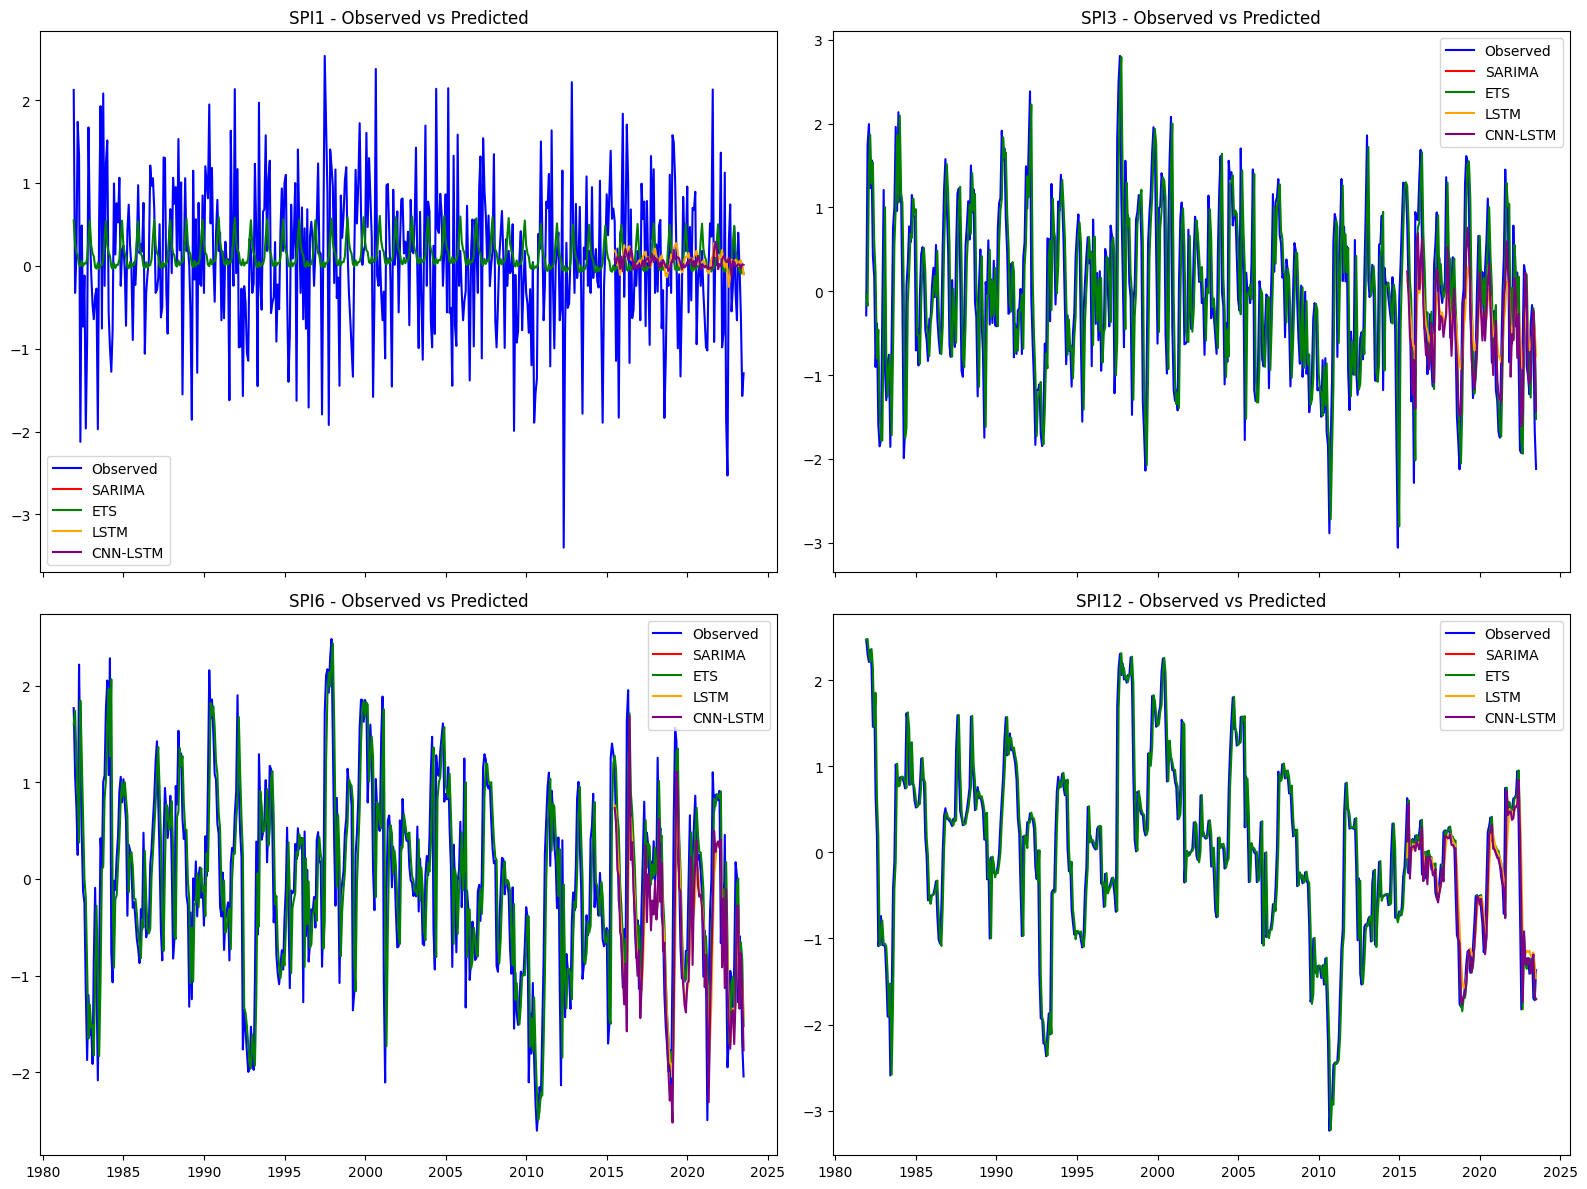

In [ ]:

import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from itertools import product

# Ensure 'Date' column is in datetime format and set frequency
SPI_Data['Date'] = pd.to_datetime(SPI_Data['Year-Month'])
SPI_Data = SPI_Data.set_index('Date')
SPI_Data.index = SPI_Data.index.to_period('M').to_timestamp()

# Remove rows with missing data
SPI_ARIMA = SPI_Data.dropna()

# Function to calculate NSE
def calculate_nse(observed, simulated):
    mean_observed = np.mean(observed)
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - mean_observed) ** 2))

# Function to perform grid search for SARIMA
def sarima_grid_search(data, seasonal=False):
    best_aic = float("inf")
    best_order = None
    best_model = None

    p = d = q = range(0, 3)
    pdq = list(product(p, d, q))

    if seasonal:
        P = D = Q = range(0, 3)
        m = [12]  # Seasonal period
        seasonal_pdq = list(product(P, D, Q, m))
    else:
        seasonal_pdq = [(0, 0, 0, 1)]

    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                model = pm.ARIMA(data, order=param, seasonal_order=seasonal_param)
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_model = model
                    best_order = param
            except:
                continue

    return best_model, best_order

# ----------------- SARIMA --------------------
# Generate and save SARIMA models
sarima_models = {}
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    if spi in SPI_ARIMA.columns:
        best_model, best_order = sarima_grid_search(SPI_ARIMA[spi])
        if best_model is not None:
            sarima_models[spi] = best_model
            pickle.dump(best_model, open(os.path.join(sav_dif_dir, f'{spi}_SARIMA_Forecaster.sav'), 'wb'))

# Load SARIMA models
sarima_models = {}
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    model_path = os.path.join(sav_dif_dir, f'{spi}_SARIMA_Forecaster.sav')
    if os.path.isfile(model_path):
        sarima_models[spi] = pickle.load(open(model_path, 'rb'))

# ----------------- Exponential Smoothing --------------------
# Generate and save Exponential Smoothing models
ets_models = {}
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    if spi in SPI_ARIMA.columns:
        model = ExponentialSmoothing(SPI_ARIMA[spi], seasonal='add', seasonal_periods=12).fit()
        ets_models[spi] = model
        pickle.dump(model, open(os.path.join(sav_dif_dir, f'{spi}_ETS_Forecaster.sav'), 'wb'))

# Load Exponential Smoothing models
ets_models = {}
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    model_path = os.path.join(sav_dif_dir, f'{spi}_ETS_Forecaster.sav')
    if os.path.isfile(model_path):
        ets_models[spi] = pickle.load(open(model_path, 'rb'))

# ----------------- LSTM Model --------------------
# Function to create and fit LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Scaling data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(SPI_ARIMA[['SPI1', 'SPI3', 'SPI6', 'SPI12']])

# Train/test split
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Define look_back
look_back = 3

# Train and fit LSTM for each SPI
lstm_models = {}
for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    X_train, y_train = create_dataset(train[:, i:i+1], look_back)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    model = create_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=50, verbose=0)
    lstm_models[spi] = model

# ----------------- CNN-LSTM Model --------------------
# Function to create CNN-LSTM model
def create_cnn_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Train and fit CNN-LSTM for each SPI
cnn_lstm_models = {}
for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    X_train, y_train = create_dataset(train[:, i:i+1], look_back)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    model = create_cnn_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=50, verbose=0)
    cnn_lstm_models[spi] = model

# ----------------- Plot Observed vs Predicted --------------------
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
axs = axs.flatten()

for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    observed = SPI_ARIMA[spi].dropna()

    # SARIMA
    if sarima_models.get(spi) is not None:
        sarima_pred = sarima_models[spi].predict(n_periods=len(observed))
    else:
        sarima_pred = np.nan * np.ones(len(observed))  # Handle missing SARIMA model

    # Exponential Smoothing
    ets_pred = ets_models[spi].fittedvalues

    # LSTM
    lstm_pred = []
    for j in range(len(test) - look_back):
        input_data = test[j:j + look_back, i].reshape(1, look_back, 1)
        prediction = lstm_models[spi].predict(input_data)
        lstm_pred.append(prediction[0, 0])
    lstm_pred = np.array(lstm_pred).reshape(-1, 1)

    # Reverse scaling; ensure the right dimensions
    lstm_pred_inverse = scaler.inverse_transform(np.concatenate((lstm_pred, np.zeros((lstm_pred.shape[0], 3))), axis=1))[:, 0]

    # CNN-LSTM
    cnn_lstm_pred = []
    for j in range(len(test) - look_back):
        input_data = test[j:j + look_back, i].reshape(1, look_back, 1)
        prediction = cnn_lstm_models[spi].predict(input_data)
        cnn_lstm_pred.append(prediction[0, 0])
    cnn_lstm_pred = np.array(cnn_lstm_pred).reshape(-1, 1)

    # Reverse scaling; ensure the right dimensions
    cnn_lstm_pred_inverse = scaler.inverse_transform(np.concatenate((cnn_lstm_pred, np.zeros((cnn_lstm_pred.shape[0], 3))), axis=1))[:, 0]

    # Plotting

    ax = axs[i]

    ax.plot(observed.index, observed, label='Observed', color='blue')

    ax.plot(observed.index, sarima_pred, label='SARIMA', color='red')

    ax.plot(observed.index, ets_pred, label='ETS', color='green')

    ax.plot(observed.index[-len(lstm_pred_inverse):], lstm_pred_inverse, label='LSTM', color='orange')

    ax.plot(observed.index[-len(cnn_lstm_pred_inverse):], cnn_lstm_pred_inverse, label='CNN-LSTM', color='purple')


    ax.set_title(f'{spi} - Observed vs Predicted')

    ax.legend()


plt.tight_layout()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

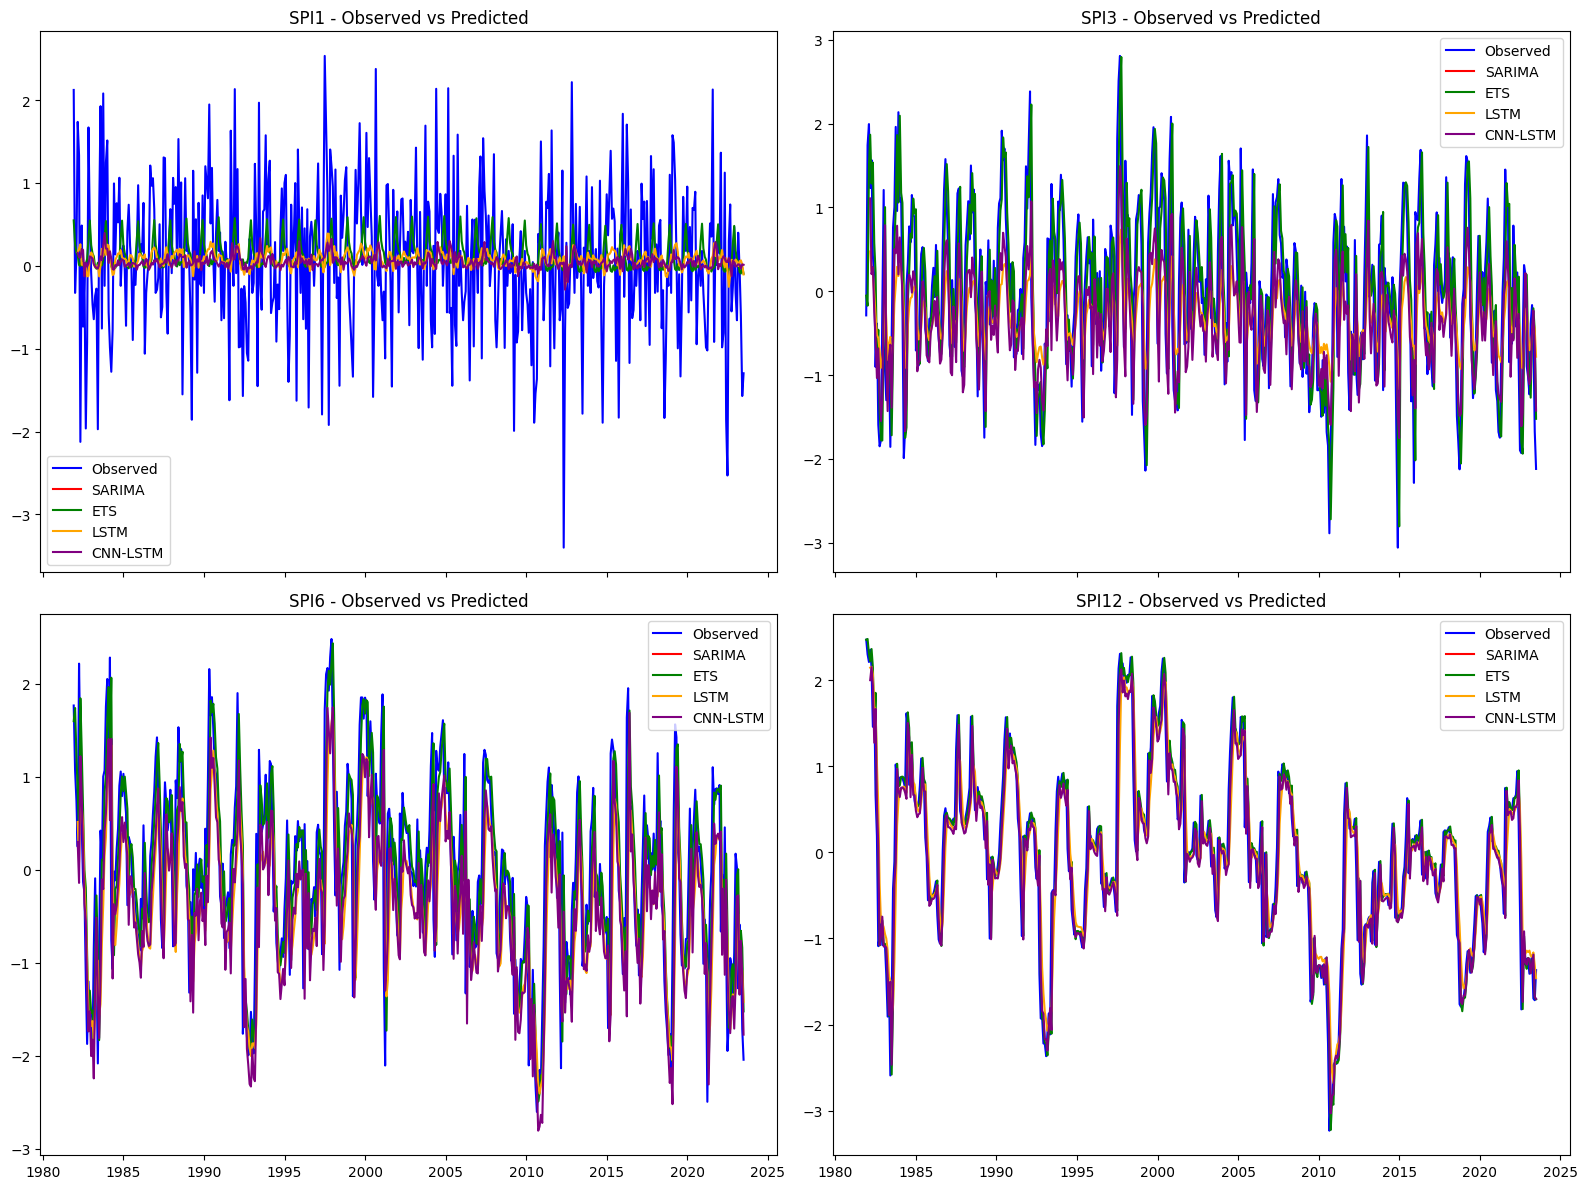

In [ ]:

# ----------------- Plot Observed vs Predicted --------------------
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
axs = axs.flatten()

for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    observed = SPI_ARIMA[spi].dropna()

    # SARIMA
    if sarima_models.get(spi) is not None:
        sarima_pred = sarima_models[spi].predict(n_periods=len(observed))
    else:
        sarima_pred = np.nan * np.ones(len(observed))  # Handle missing SARIMA model

    # Exponential Smoothing
    ets_pred = ets_models[spi].fittedvalues

    # LSTM - Generate predictions for the entire period
    lstm_pred_full = []
    full_data = scaled_data[:, i:i+1]
    for j in range(len(full_data) - look_back):
        input_data = full_data[j:j + look_back].reshape(1, look_back, 1)
        prediction = lstm_models[spi].predict(input_data)
        lstm_pred_full.append(prediction[0, 0])

    # Pad predictions to match the length of observed data
    lstm_pred_full = np.concatenate([np.full(look_back, np.nan), lstm_pred_full])  # Add NaN for initial look_back periods
    lstm_pred_full_inverse = scaler.inverse_transform(np.concatenate((lstm_pred_full.reshape(-1, 1),
                                                                      np.zeros((lstm_pred_full.shape[0], 3))), axis=1))[:, 0]

    # CNN-LSTM - Generate predictions for the entire period
    cnn_lstm_pred_full = []
    for j in range(len(full_data) - look_back):
        input_data = full_data[j:j + look_back].reshape(1, look_back, 1)
        prediction = cnn_lstm_models[spi].predict(input_data)
        cnn_lstm_pred_full.append(prediction[0, 0])

    # Pad predictions to match the length of observed data
    cnn_lstm_pred_full = np.concatenate([np.full(look_back, np.nan), cnn_lstm_pred_full])  # Add NaN for initial look_back periods
    cnn_lstm_pred_full_inverse = scaler.inverse_transform(np.concatenate((cnn_lstm_pred_full.reshape(-1, 1),
                                                                         np.zeros((cnn_lstm_pred_full.shape[0], 3))), axis=1))[:, 0]

    # Plotting
    ax = axs[i]

    ax.plot(observed.index, observed, label='Observed', color='blue')

    ax.plot(observed.index, sarima_pred, label='SARIMA', color='red')

    ax.plot(observed.index, ets_pred, label='ETS', color='green')

    ax.plot(observed.index, lstm_pred_full_inverse, label='LSTM', color='orange')

    ax.plot(observed.index, cnn_lstm_pred_full_inverse, label='CNN-LSTM', color='purple')

    ax.set_title(f'{spi} - Observed vs Predicted')

    ax.legend()

plt.tight_layout()
plt.show()

# Trials

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step

Performance metrics for SPI1:
LSTM: RMSE=0.060, MAE=0.052, NSE=0.995

Performance metrics for SPI3:
LSTM: RMSE=0.054, MAE=0.046, NSE=0.997

Performance metrics for SPI6:
LSTM: RMSE=0.058, MAE=0.051, NSE=0.996

Performance metrics for SPI12:
LSTM: RMSE=0.061, MAE=0.051, NSE=0.991


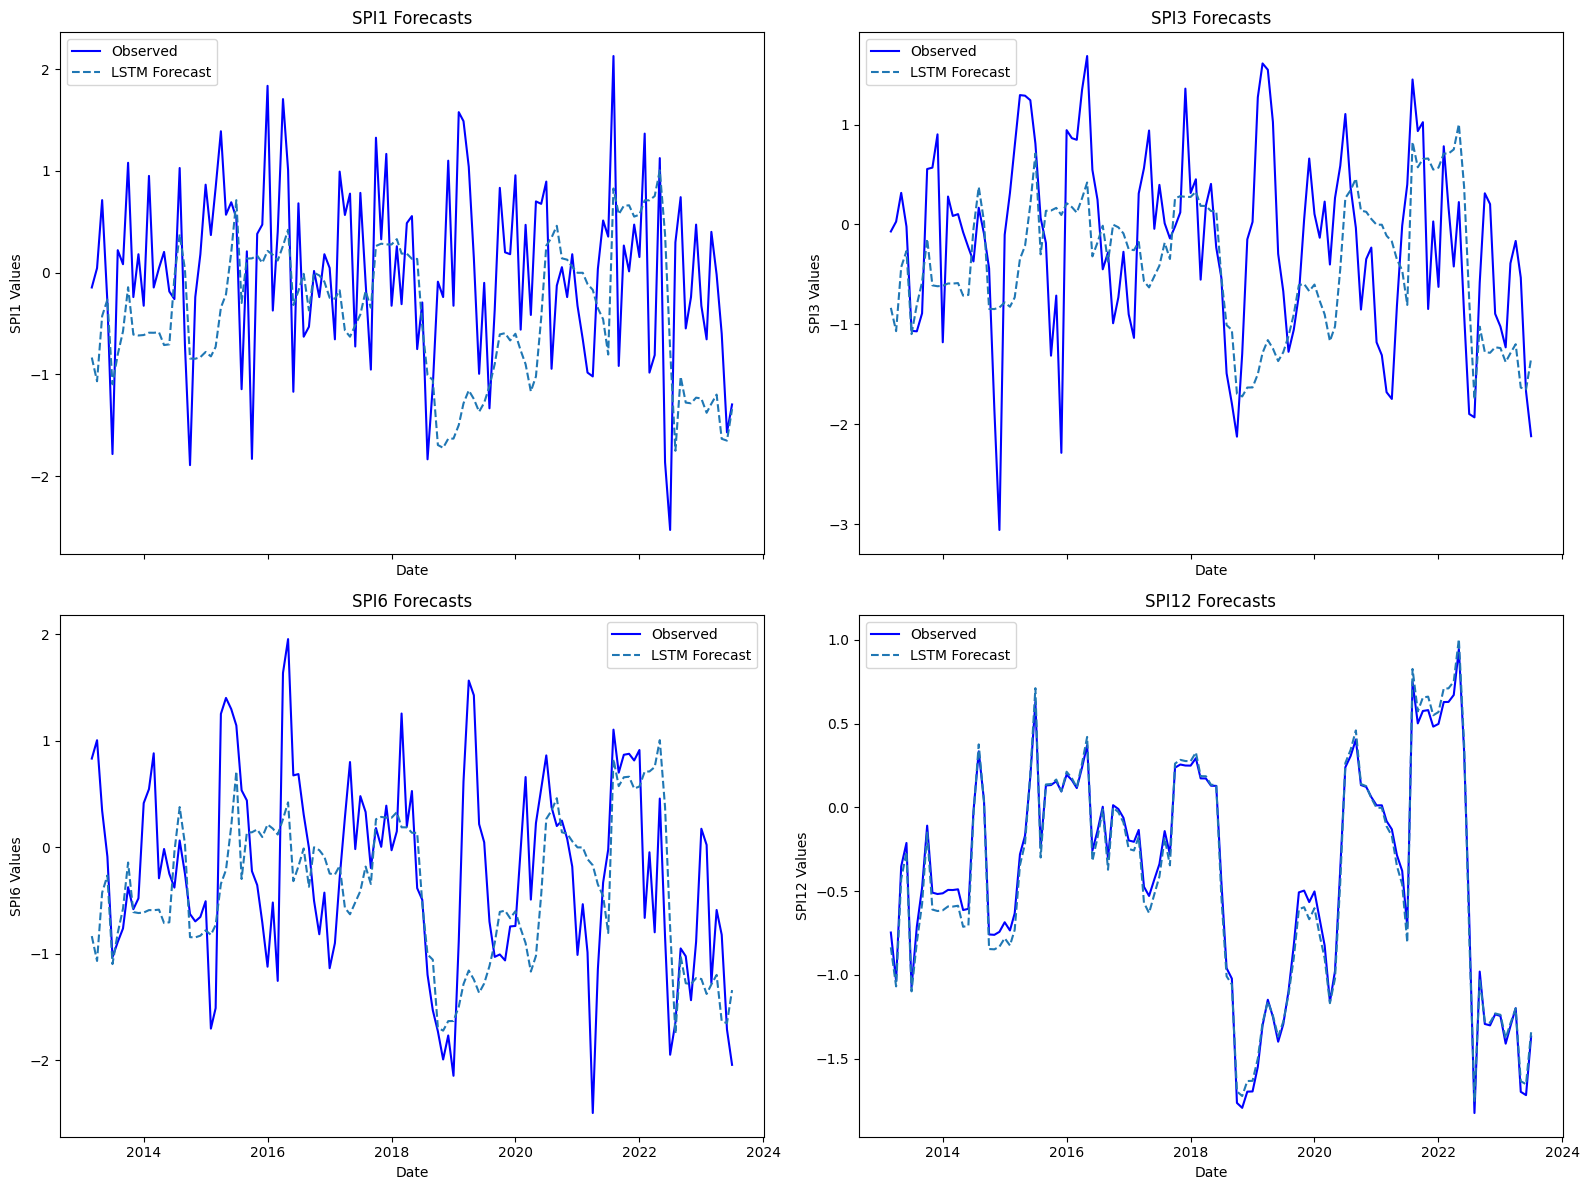

In [ ]:
import pandas as pd
import numpy as np
import pickle
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
import pmdarima as pm

# Function to calculate Nash Sutcliffe Efficiency (NSE)
def calculate_nse(observed, simulated):
    mean_observed = np.mean(observed)
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - mean_observed) ** 2))

# Prepare the data (ensure your 'Date' is the index and data is in the right format)
SPI_Data = SPI_Data.dropna()  # Ensure no missing data

# Split the dataset for training and testing (80/20 split)
train_size = int(len(SPI_Data) * 0.75)
train_data = SPI_Data[:train_size]
test_data = SPI_Data[train_size:]

# Store metrics for all models
all_metrics = {}

# Define time-series split for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# LSTM model
def lstm_forecast(train, test, spi):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Prepare data for LSTM
    X_train = np.array(train[spi].values).reshape(-1, 1, 1)
    X_test = np.array(test[spi].values).reshape(-1, 1, 1)

    model.fit(X_train, train[spi], epochs=50, batch_size=64, verbose=0)
    forecast = model.predict(X_test).flatten()
    return forecast


# Evaluate and compare models
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    observed = test_data[spi].values

    # Run different models
    forecasts = {'LSTM': lstm_forecast(train_data, test_data, spi)}

    # Calculate performance metrics for each model
    model_metrics = {}
    for model_name, forecast in forecasts.items():
        rmse = np.sqrt(mean_squared_error(observed, forecast))
        mae = mean_absolute_error(observed, forecast)
        nse = calculate_nse(observed, forecast)
        model_metrics[model_name] = {'RMSE': rmse, 'MAE': mae, 'NSE': nse}

    all_metrics[spi] = model_metrics

# Display metrics for each SPI and model
for spi, metrics in all_metrics.items():
    print(f"\nPerformance metrics for {spi}:")
    for model_name, metric in metrics.items():
        print(f"{model_name}: RMSE={metric['RMSE']:.3f}, MAE={metric['MAE']:.3f}, NSE={metric['NSE']:.3f}")

# Plotting observed and simulated SPI values for all models in 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
axs = axs.flatten()

for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    ax = axs[i]
    observed_spi = test_data[spi]

    # Plot observed SPI
    ax.plot(observed_spi.index, observed_spi, label='Observed', color='blue')

    # Plot forecasted SPI for each model
    for model_name, forecast in forecasts.items():
        ax.plot(test_data.index, forecast, label=f'{model_name} Forecast', linestyle='--')

    # Set titles and labels
    ax.set_title(f'{spi} Forecasts')
    ax.set_xlabel('Date')
    ax.set_ylabel(f'{spi} Values')
    ax.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - loss: 0.2389 - val_loss: 0.0338
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0434 - val_loss: 0.0245
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0292 - val_loss: 0.0249
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0278 - val_loss: 0.0239
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0237 - val_loss: 0.0233
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0255 - val_loss: 0.0230
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0233 - val_loss: 0.0234
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0231 - val_loss: 0.0239
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0214 - val_loss: 0.0219
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0212 - val_loss: 0.0254
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.2610 - val_loss: 0.0362
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0524 - val_loss: 0.0297
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0423 - val_loss: 0.0248
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0341 - val_loss: 0.0236
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0338 - val_loss: 0.0227
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0338 - val_loss: 0.0240
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0292 - val_loss: 0.0226
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0321 - val_loss: 0.0227
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0285 - val_loss: 0.0241
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0297 - val_loss: 0.0217
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0297 - val_loss: 0.0220
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0268 - val_l

<ipython-input-18-92e4d9b4a729>:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df[0], x='Model', y='RMSE', palette='viridis')
<ipython-input-18-92e4d9b4a729>:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df[0], x='Model', y='RMSE', palette='viridis')
<ipython-input-18-92e4d9b4a729>:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df[0], x='Model', y='RMSE', palette='viridis')
<ipython-input-18-92e4d9b4a729>:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

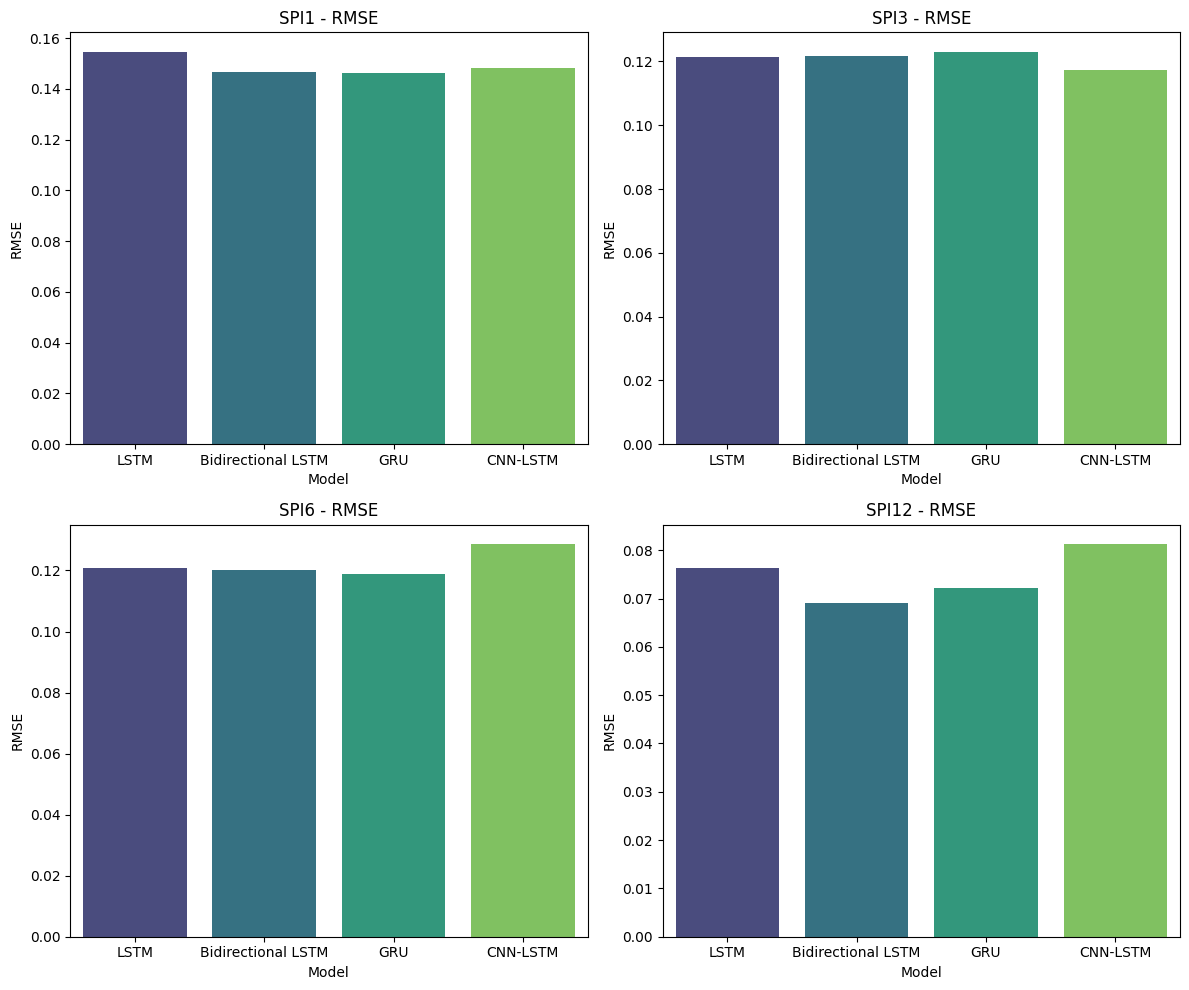

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
from tensorflow.keras.layers import LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define evaluation metrics
def nash_sutcliffe_efficiency(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    nse = nash_sutcliffe_efficiency(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true.flatten(), y_pred.flatten())
    return rmse, mae, nse, pearson_corr

def print_metrics(model_name, rmse, mae, nse, pearson_corr):
    print(f'{model_name} Performance:')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'NSE: {nse:.4f}')
    print(f'Pearson Correlation: {pearson_corr:.4f}\n')

# Time series data structure
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

# Build models
def build_lstm_model(input_shape):
    model = tf.keras.Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_bidirectional_lstm_model(input_shape):
    model = tf.keras.Sequential([
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(64)),
        Dropout(0.2),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_gru_model(input_shape):
    model = tf.keras.Sequential([
        GRU(64, return_sequences=True),
        GRU(64),
        Dropout(0.2),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_cnn_lstm_model(input_shape):
    model = tf.keras.Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dropout(0.2),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Prepare the data (Assuming SPI_Data is loaded)
numeric_data = SPI_Data.drop(columns=['Year-Month'])
numeric_data = numeric_data.ffill().bfill()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(numeric_data.values)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns, index=SPI_Data.index)

time_step = 12
scaled_values = scaled_df.values
X, y = create_dataset(scaled_values, time_step)

# Split the dataset for training and testing (75/25 split as per your request)
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

input_shape = (X_train.shape[1], X_train.shape[2])

# Train LSTM
lstm_model = build_lstm_model(input_shape)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
y_pred_lstm = lstm_model.predict(X_test)
rmse_lstm, mae_lstm, nse_lstm, pearson_corr_lstm = calculate_metrics(y_test, y_pred_lstm)
print_metrics('LSTM', rmse_lstm, mae_lstm, nse_lstm, pearson_corr_lstm)

# Train Bidirectional LSTM
bi_lstm_model = build_bidirectional_lstm_model(input_shape)
bi_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
y_pred_bi_lstm = bi_lstm_model.predict(X_test)
rmse_bi_lstm, mae_bi_lstm, nse_bi_lstm, pearson_corr_bi_lstm = calculate_metrics(y_test, y_pred_bi_lstm)
print_metrics('Bidirectional LSTM', rmse_bi_lstm, mae_bi_lstm, nse_bi_lstm, pearson_corr_bi_lstm)

# Train GRU
gru_model = build_gru_model(input_shape)
gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
y_pred_gru = gru_model.predict(X_test)
rmse_gru, mae_gru, nse_gru, pearson_corr_gru = calculate_metrics(y_test, y_pred_gru)
print_metrics('GRU', rmse_gru, mae_gru, nse_gru, pearson_corr_gru)

# Train CNN-LSTM
cnn_lstm_model = build_cnn_lstm_model(input_shape)
cnn_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)
rmse_cnn_lstm, mae_cnn_lstm, nse_cnn_lstm, pearson_corr_cnn_lstm = calculate_metrics(y_test, y_pred_cnn_lstm)
print_metrics('CNN-LSTM', rmse_cnn_lstm, mae_cnn_lstm, nse_cnn_lstm, pearson_corr_cnn_lstm)

# Function to calculate metrics for each SPI index separately
def calculate_spi_metrics_per_index(y_true, y_pred_lstm, y_pred_bi_lstm, y_pred_gru, y_pred_cnn_lstm):
    spi_metrics = {'SPI1': [], 'SPI3': [], 'SPI6': [], 'SPI12': []}

    for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
        metrics = {
            'Model': ['LSTM', 'Bidirectional LSTM', 'GRU', 'CNN-LSTM'],
            'RMSE': [
                np.sqrt(mean_squared_error(y_true[:, i], y_pred_lstm[:, i])),
                np.sqrt(mean_squared_error(y_true[:, i], y_pred_bi_lstm[:, i])),
                np.sqrt(mean_squared_error(y_true[:, i], y_pred_gru[:, i])),
                np.sqrt(mean_squared_error(y_true[:, i], y_pred_cnn_lstm[:, i]))
            ],
            'MAE': [
                mean_absolute_error(y_true[:, i], y_pred_lstm[:, i]),
                mean_absolute_error(y_true[:, i], y_pred_bi_lstm[:, i]),
                mean_absolute_error(y_true[:, i], y_pred_gru[:, i]),
                mean_absolute_error(y_true[:, i], y_pred_cnn_lstm[:, i])
            ],
            'NSE': [
                nash_sutcliffe_efficiency(y_true[:, i], y_pred_lstm[:, i]),
                nash_sutcliffe_efficiency(y_true[:, i], y_pred_bi_lstm[:, i]),
                nash_sutcliffe_efficiency(y_true[:, i], y_pred_gru[:, i]),
                nash_sutcliffe_efficiency(y_true[:, i], y_pred_cnn_lstm[:, i])
            ],
            'Pearson Correlation': [
                pearsonr(y_true[:, i], y_pred_lstm[:, i])[0],
                pearsonr(y_true[:, i], y_pred_bi_lstm[:, i])[0],
                pearsonr(y_true[:, i], y_pred_gru[:, i])[0],
                pearsonr(y_true[:, i], y_pred_cnn_lstm[:, i])[0]
            ]
        }
        spi_metrics[spi].append(pd.DataFrame(metrics))
    return spi_metrics

spi_metrics = calculate_spi_metrics_per_index(y_test, y_pred_lstm, y_pred_bi_lstm, y_pred_gru, y_pred_cnn_lstm)

# Plot results
def plot_model_performance(spi_metrics):
    plt.figure(figsize=(12, 10))
    for spi, metrics_df in spi_metrics.items():
        plt.subplot(2, 2, ['SPI1', 'SPI3', 'SPI6', 'SPI12'].index(spi) + 1)
        sns.barplot(data=metrics_df[0], x='Model', y='RMSE', palette='viridis')
        plt.title(f'{spi} - RMSE')
        plt.ylabel('RMSE')
        plt.xlabel('Model')

    plt.tight_layout()
    plt.show()

plot_model_performance(spi_metrics)

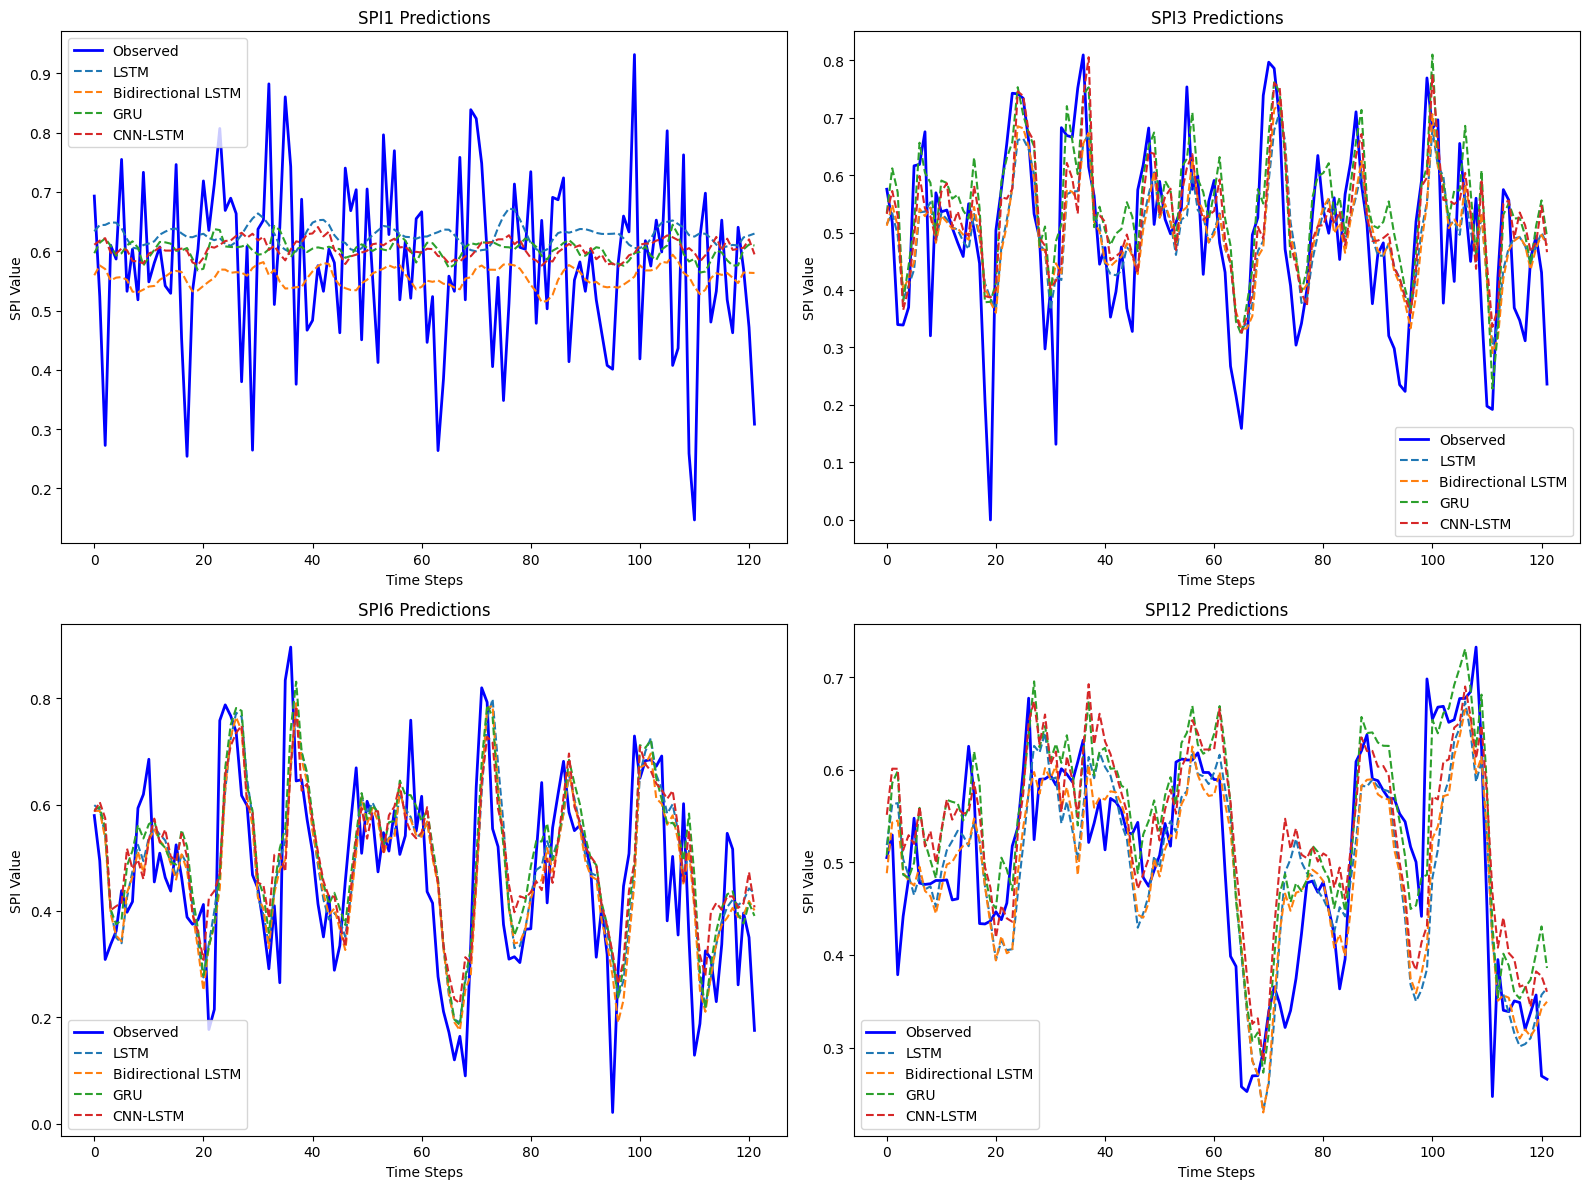

In [ ]:
import matplotlib.pyplot as plt

# Function to plot observed and predicted SPI values
def plot_spi_comparison(y_test, y_pred_lstm, y_pred_bi_lstm, y_pred_gru, y_pred_cnn_lstm):
    # SPI indices
    spi_indices = ['SPI1', 'SPI3', 'SPI6', 'SPI12']

    plt.figure(figsize=(16, 12))

    for i, spi in enumerate(spi_indices):
        plt.subplot(2, 2, i + 1)

        # Plot observed values
        plt.plot(y_test[:, i], label='Observed', color='blue', linewidth=2)

        # Plot predicted values from each model
        plt.plot(y_pred_lstm[:, i], label='LSTM', linestyle='--')
        plt.plot(y_pred_bi_lstm[:, i], label='Bidirectional LSTM', linestyle='--')
        plt.plot(y_pred_gru[:, i], label='GRU', linestyle='--')
        plt.plot(y_pred_cnn_lstm[:, i], label='CNN-LSTM', linestyle='--')

        # Adding titles and labels
        plt.title(f'{spi} Predictions')
        plt.xlabel('Time Steps')
        plt.ylabel('SPI Value')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_spi_comparison(y_test, y_pred_lstm, y_pred_bi_lstm, y_pred_gru, y_pred_cnn_lstm)


In [ ]:
!pip install tensorflow==2.12.0
!pip install tensorflow-addons==0.19.0

In [ ]:
!pip install optuna
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
from tensorflow.keras.layers import LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define evaluation metrics
def nash_sutcliffe_efficiency(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    nse = nash_sutcliffe_efficiency(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true.flatten(), y_pred.flatten())
    return rmse, mae, nse, pearson_corr

def print_metrics(model_name, rmse, mae, nse, pearson_corr):
    print(f'{model_name} Performance:')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'NSE: {nse:.4f}')
    print(f'Pearson Correlation: {pearson_corr:.4f}\n')

# Time series data structure
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

# Build models
def build_lstm_model(input_shape, units=50, dropout_rate=0.2):
    model = tf.keras.Sequential([
        LSTM(units, return_sequences=True, input_shape=input_shape),
        LSTM(units),
        Dropout(dropout_rate),
        Dense(input_shape[1])
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_bidirectional_lstm_model(input_shape, units=64, dropout_rate=0.2):
    inputs = tf.keras.Input(shape=input_shape)
    x = Bidirectional(LSTM(units, return_sequences=True, kernel_regularizer=regularizers.l2(0.001)))(inputs)
    x = Bidirectional(LSTM(units, kernel_regularizer=regularizers.l2(0.001)))(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(input_shape[1])(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-4, decay_steps=2000, decay_rate=0.9)
    model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mean_squared_error')
    return model

def build_gru_model(input_shape, units=64, dropout_rate=0.2):
    inputs = tf.keras.Input(shape=input_shape)
    x = GRU(units, return_sequences=True, kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = GRU(units, kernel_regularizer=regularizers.l2(0.001))(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(input_shape[1])(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-4, decay_steps=2000, decay_rate=0.9)
    model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mean_squared_error')
    return model

def build_cnn_lstm_model(input_shape, filters=64, kernel_size=3, dropout_rate=0.2):
    inputs = tf.keras.Input(shape=input_shape)
    x = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = LSTM(filters, return_sequences=True)(x)
    x = LSTM(filters)(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(input_shape[1])(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-4, decay_steps=2000, decay_rate=0.9)
    model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mean_squared_error')
    return model

# Define Optuna objective function
def objective(trial):
    time_step = 12
    units = trial.suggest_int('units', 32, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    filters = trial.suggest_int('filters', 32, 128)
    kernel_size = trial.suggest_int('kernel_size', 2, 5)

    # Prepare the data
    date_column = SPI_Data['Year-Month']
    numeric_data = SPI_Data.drop(columns=['Year-Month'])
    numeric_data = numeric_data.ffill().bfill()

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(numeric_data.values)
    scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns, index=SPI_Data.index)

    scaled_values = scaled_df.values
    X, y = create_dataset(scaled_values, time_step)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    input_shape = (time_step, X_train.shape[2])

    # Build and train model
    model = build_cnn_lstm_model(input_shape, filters=filters, kernel_size=kernel_size, dropout_rate=dropout_rate)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0)

    # Evaluate model
    y_pred = model.predict(X_test)
    rmse, mae, nse, pearson_corr = calculate_metrics(y_test, y_pred)

    return rmse  # Optuna will minimize this value

# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print('Best hyperparameters:', study.best_params)

# Train the final model with the best hyperparameters
best_params = study.best_params
lstm_model = build_cnn_lstm_model(input_shape, filters=best_params['filters'], kernel_size=best_params['kernel_size'], dropout_rate=best_params['dropout_rate'])
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
lstm_model.save('cnn_lstm_model_best.h5')

y_pred_final = lstm_model.predict(X_test)
rmse_final, mae_final, nse_final, pearson_corr_final = calculate_metrics(y_test, y_pred_final)
print_metrics('CNN-LSTM with Bayesian Optimization', rmse_final, mae_final, nse_final, pearson_corr_final)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


[I 2024-09-11 17:53:25,315] A new study created in memory with name: no-name-05844270-9704-41af-b6ec-a20ba294b8a8


4/4 [==============================] - 4s 10ms/step


[I 2024-09-11 17:54:12,549] Trial 0 finished with value: 0.1547293126888231 and parameters: {'units': 106, 'dropout_rate': 0.4856875436031921, 'filters': 72, 'kernel_size': 4}. Best is trial 0 with value: 0.1547293126888231.


4/4 [==============================] - 1s 6ms/step


[I 2024-09-11 17:55:04,840] Trial 1 finished with value: 0.15341987119150335 and parameters: {'units': 101, 'dropout_rate': 0.3537660050306871, 'filters': 77, 'kernel_size': 5}. Best is trial 1 with value: 0.15341987119150335.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 17:55:38,085] Trial 2 finished with value: 0.15543640325011812 and parameters: {'units': 65, 'dropout_rate': 0.3915983684993699, 'filters': 117, 'kernel_size': 3}. Best is trial 1 with value: 0.15341987119150335.


4/4 [==============================] - 2s 5ms/step


[I 2024-09-11 17:55:56,805] Trial 3 finished with value: 0.15871655559753342 and parameters: {'units': 76, 'dropout_rate': 0.37124177268813996, 'filters': 38, 'kernel_size': 3}. Best is trial 1 with value: 0.15341987119150335.


4/4 [==============================] - 1s 6ms/step


[I 2024-09-11 17:56:24,904] Trial 4 finished with value: 0.15628921907663504 and parameters: {'units': 96, 'dropout_rate': 0.43234572663140236, 'filters': 71, 'kernel_size': 2}. Best is trial 1 with value: 0.15341987119150335.


4/4 [==============================] - 1s 4ms/step


[I 2024-09-11 17:56:41,615] Trial 5 finished with value: 0.15776030321484516 and parameters: {'units': 101, 'dropout_rate': 0.11761787880990263, 'filters': 32, 'kernel_size': 3}. Best is trial 1 with value: 0.15341987119150335.


4/4 [==============================] - 1s 5ms/step


[I 2024-09-11 17:56:58,501] Trial 6 finished with value: 0.1565823613482959 and parameters: {'units': 128, 'dropout_rate': 0.44788254748934475, 'filters': 47, 'kernel_size': 5}. Best is trial 1 with value: 0.15341987119150335.


4/4 [==============================] - 1s 7ms/step


[I 2024-09-11 17:57:19,765] Trial 7 finished with value: 0.15578363078390497 and parameters: {'units': 35, 'dropout_rate': 0.4952123387372599, 'filters': 62, 'kernel_size': 4}. Best is trial 1 with value: 0.15341987119150335.


4/4 [==============================] - 1s 6ms/step


[I 2024-09-11 17:57:47,878] Trial 8 finished with value: 0.1555718602972408 and parameters: {'units': 84, 'dropout_rate': 0.3701631791521153, 'filters': 72, 'kernel_size': 5}. Best is trial 1 with value: 0.15341987119150335.


4/4 [==============================] - 1s 6ms/step


[I 2024-09-11 17:58:09,419] Trial 9 finished with value: 0.1526869880341647 and parameters: {'units': 103, 'dropout_rate': 0.44026527446085695, 'filters': 96, 'kernel_size': 4}. Best is trial 9 with value: 0.1526869880341647.


4/4 [==============================] - 2s 8ms/step


[I 2024-09-11 17:58:37,019] Trial 10 finished with value: 0.15164684122024494 and parameters: {'units': 128, 'dropout_rate': 0.23902866106307294, 'filters': 104, 'kernel_size': 2}. Best is trial 10 with value: 0.15164684122024494.


4/4 [==============================] - 1s 7ms/step


[I 2024-09-11 17:59:03,340] Trial 11 finished with value: 0.1513923858495324 and parameters: {'units': 122, 'dropout_rate': 0.227715766157918, 'filters': 103, 'kernel_size': 2}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 17:59:29,972] Trial 12 finished with value: 0.1523130532907341 and parameters: {'units': 126, 'dropout_rate': 0.22226316249800918, 'filters': 102, 'kernel_size': 2}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:00:17,677] Trial 13 finished with value: 0.15338841987099697 and parameters: {'units': 119, 'dropout_rate': 0.24422163582534492, 'filters': 126, 'kernel_size': 2}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:00:44,980] Trial 14 finished with value: 0.15220980616902502 and parameters: {'units': 116, 'dropout_rate': 0.19807919768482396, 'filters': 102, 'kernel_size': 2}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:01:08,595] Trial 15 finished with value: 0.15480329932967155 and parameters: {'units': 57, 'dropout_rate': 0.2989799092301424, 'filters': 92, 'kernel_size': 3}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 7ms/step


[I 2024-09-11 18:01:55,767] Trial 16 finished with value: 0.1520851127918507 and parameters: {'units': 114, 'dropout_rate': 0.1555398069300775, 'filters': 114, 'kernel_size': 2}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:02:15,605] Trial 17 finished with value: 0.1548191382736684 and parameters: {'units': 91, 'dropout_rate': 0.28358852001538337, 'filters': 85, 'kernel_size': 2}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 11ms/step


[I 2024-09-11 18:02:45,113] Trial 18 finished with value: 0.1567187500312018 and parameters: {'units': 113, 'dropout_rate': 0.1693974755161231, 'filters': 109, 'kernel_size': 3}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 16ms/step


[I 2024-09-11 18:03:20,101] Trial 19 finished with value: 0.15534506136890835 and parameters: {'units': 128, 'dropout_rate': 0.24615523513210646, 'filters': 123, 'kernel_size': 2}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:03:46,997] Trial 20 finished with value: 0.15351141237795 and parameters: {'units': 33, 'dropout_rate': 0.33184434250973627, 'filters': 88, 'kernel_size': 3}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 11ms/step


[I 2024-09-11 18:04:13,701] Trial 21 finished with value: 0.1526746948531993 and parameters: {'units': 113, 'dropout_rate': 0.13237524383014418, 'filters': 113, 'kernel_size': 2}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 7ms/step


[I 2024-09-11 18:04:42,290] Trial 22 finished with value: 0.15542434945950118 and parameters: {'units': 119, 'dropout_rate': 0.17968352130765955, 'filters': 106, 'kernel_size': 2}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 7ms/step


[I 2024-09-11 18:05:09,851] Trial 23 finished with value: 0.15271364958851613 and parameters: {'units': 110, 'dropout_rate': 0.15700483415605476, 'filters': 96, 'kernel_size': 2}. Best is trial 11 with value: 0.1513923858495324.


4/4 [==============================] - 1s 7ms/step


[I 2024-09-11 18:05:38,961] Trial 24 finished with value: 0.15064827129663896 and parameters: {'units': 122, 'dropout_rate': 0.2629753217616222, 'filters': 116, 'kernel_size': 2}. Best is trial 24 with value: 0.15064827129663896.


4/4 [==============================] - 1s 10ms/step


[I 2024-09-11 18:06:28,625] Trial 25 finished with value: 0.15058903343350213 and parameters: {'units': 121, 'dropout_rate': 0.2586031760032472, 'filters': 119, 'kernel_size': 3}. Best is trial 25 with value: 0.15058903343350213.


4/4 [==============================] - 1s 9ms/step


[I 2024-09-11 18:07:01,203] Trial 26 finished with value: 0.1547788571398345 and parameters: {'units': 89, 'dropout_rate': 0.27178611497304245, 'filters': 120, 'kernel_size': 3}. Best is trial 25 with value: 0.15058903343350213.


4/4 [==============================] - 1s 9ms/step


[I 2024-09-11 18:07:48,372] Trial 27 finished with value: 0.1505281747779805 and parameters: {'units': 122, 'dropout_rate': 0.327151449432394, 'filters': 120, 'kernel_size': 4}. Best is trial 27 with value: 0.1505281747779805.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:08:36,774] Trial 28 finished with value: 0.15326650482371368 and parameters: {'units': 72, 'dropout_rate': 0.32762223238729515, 'filters': 127, 'kernel_size': 4}. Best is trial 27 with value: 0.1505281747779805.


4/4 [==============================] - 1s 9ms/step


[I 2024-09-11 18:09:25,360] Trial 29 finished with value: 0.14877127308006385 and parameters: {'units': 109, 'dropout_rate': 0.26826383774799306, 'filters': 128, 'kernel_size': 4}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 9ms/step


[I 2024-09-11 18:10:13,409] Trial 30 finished with value: 0.15283040744546986 and parameters: {'units': 107, 'dropout_rate': 0.3016301717303786, 'filters': 126, 'kernel_size': 4}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:10:43,543] Trial 31 finished with value: 0.15141257230582889 and parameters: {'units': 120, 'dropout_rate': 0.2697643638508978, 'filters': 118, 'kernel_size': 4}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 9ms/step


[I 2024-09-11 18:11:32,128] Trial 32 finished with value: 0.15256415166781637 and parameters: {'units': 108, 'dropout_rate': 0.3106628156573525, 'filters': 113, 'kernel_size': 4}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 15ms/step


[I 2024-09-11 18:12:03,025] Trial 33 finished with value: 0.1540884747496544 and parameters: {'units': 121, 'dropout_rate': 0.20812112088422702, 'filters': 120, 'kernel_size': 5}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:12:51,323] Trial 34 finished with value: 0.1525072283318525 and parameters: {'units': 104, 'dropout_rate': 0.3401929345753382, 'filters': 128, 'kernel_size': 4}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 9ms/step


[I 2024-09-11 18:13:16,051] Trial 35 finished with value: 0.15368928473778234 and parameters: {'units': 97, 'dropout_rate': 0.39440526933726516, 'filters': 110, 'kernel_size': 3}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:13:50,455] Trial 36 finished with value: 0.15143741997544272 and parameters: {'units': 47, 'dropout_rate': 0.2670056603045547, 'filters': 119, 'kernel_size': 5}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 5ms/step


[I 2024-09-11 18:14:16,611] Trial 37 finished with value: 0.1542584350168064 and parameters: {'units': 98, 'dropout_rate': 0.35695878824646654, 'filters': 54, 'kernel_size': 3}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 9ms/step


[I 2024-09-11 18:15:03,139] Trial 38 finished with value: 0.1567657912129534 and parameters: {'units': 123, 'dropout_rate': 0.3151173680379776, 'filters': 122, 'kernel_size': 4}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 9ms/step


[I 2024-09-11 18:15:52,890] Trial 39 finished with value: 0.15362002130551933 and parameters: {'units': 110, 'dropout_rate': 0.254785308538511, 'filters': 115, 'kernel_size': 3}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 6ms/step


[I 2024-09-11 18:16:19,184] Trial 40 finished with value: 0.154852665824745 and parameters: {'units': 92, 'dropout_rate': 0.3994187312452604, 'filters': 78, 'kernel_size': 5}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:17:06,108] Trial 41 finished with value: 0.15343404710746114 and parameters: {'units': 123, 'dropout_rate': 0.2224444742464966, 'filters': 109, 'kernel_size': 4}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 6ms/step


[I 2024-09-11 18:17:29,206] Trial 42 finished with value: 0.15302314753677732 and parameters: {'units': 118, 'dropout_rate': 0.2889098287029957, 'filters': 99, 'kernel_size': 3}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:18:04,313] Trial 43 finished with value: 0.1545115872976772 and parameters: {'units': 123, 'dropout_rate': 0.22622720384466477, 'filters': 116, 'kernel_size': 4}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 9ms/step


[I 2024-09-11 18:18:36,841] Trial 44 finished with value: 0.15681789312373906 and parameters: {'units': 115, 'dropout_rate': 0.1972668435961158, 'filters': 124, 'kernel_size': 4}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 7ms/step


[I 2024-09-11 18:19:03,800] Trial 45 finished with value: 0.1507229919773886 and parameters: {'units': 125, 'dropout_rate': 0.25771811096112074, 'filters': 106, 'kernel_size': 2}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:19:33,166] Trial 46 finished with value: 0.15525171806920607 and parameters: {'units': 81, 'dropout_rate': 0.25955416084861377, 'filters': 108, 'kernel_size': 3}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 9ms/step


[I 2024-09-11 18:20:05,004] Trial 47 finished with value: 0.15275103930044348 and parameters: {'units': 126, 'dropout_rate': 0.4691137269836798, 'filters': 123, 'kernel_size': 2}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 6ms/step


[I 2024-09-11 18:20:25,986] Trial 48 finished with value: 0.15480321563489152 and parameters: {'units': 101, 'dropout_rate': 0.2813045466424629, 'filters': 69, 'kernel_size': 4}. Best is trial 29 with value: 0.14877127308006385.


4/4 [==============================] - 1s 8ms/step


[I 2024-09-11 18:20:57,065] Trial 49 finished with value: 0.1543925912633431 and parameters: {'units': 128, 'dropout_rate': 0.3525325962266462, 'filters': 128, 'kernel_size': 2}. Best is trial 29 with value: 0.14877127308006385.


Best hyperparameters: {'units': 109, 'dropout_rate': 0.26826383774799306, 'filters': 128, 'kernel_size': 4}
Epoch 1/50
13/13 [==============================] - 8s 141ms/step - loss: 0.3085 - val_loss: 0.2301
Epoch 2/50
13/13 [==============================] - 1s 67ms/step - loss: 0.2321 - val_loss: 0.1580
Epoch 3/50
13/13 [==============================] - 1s 64ms/step - loss: 0.1416 - val_loss: 0.0742
Epoch 4/50
13/13 [==============================] - 1s 70ms/step - loss: 0.0589 - val_loss: 0.0351
Epoch 5/50
13/13 [==============================] - 1s 72ms/step - loss: 0.0461 - val_loss: 0.0347
Epoch 6/50
13/13 [==============================] - 1s 70ms/step - loss: 0.0407 - val_loss: 0.0343
Epoch 7/50
13/13 [==============================] - 1s 39ms/step - loss: 0.0404 - val_loss: 0.0336
Epoch 8/50
13/13 [==============================] - 0s 37ms/step - loss: 0.0406 - val_loss: 0.0336
Epoch 9/50
13/13 [==============================] - 1s 42ms/step - loss: 0.0405 - val_loss: 0.0330


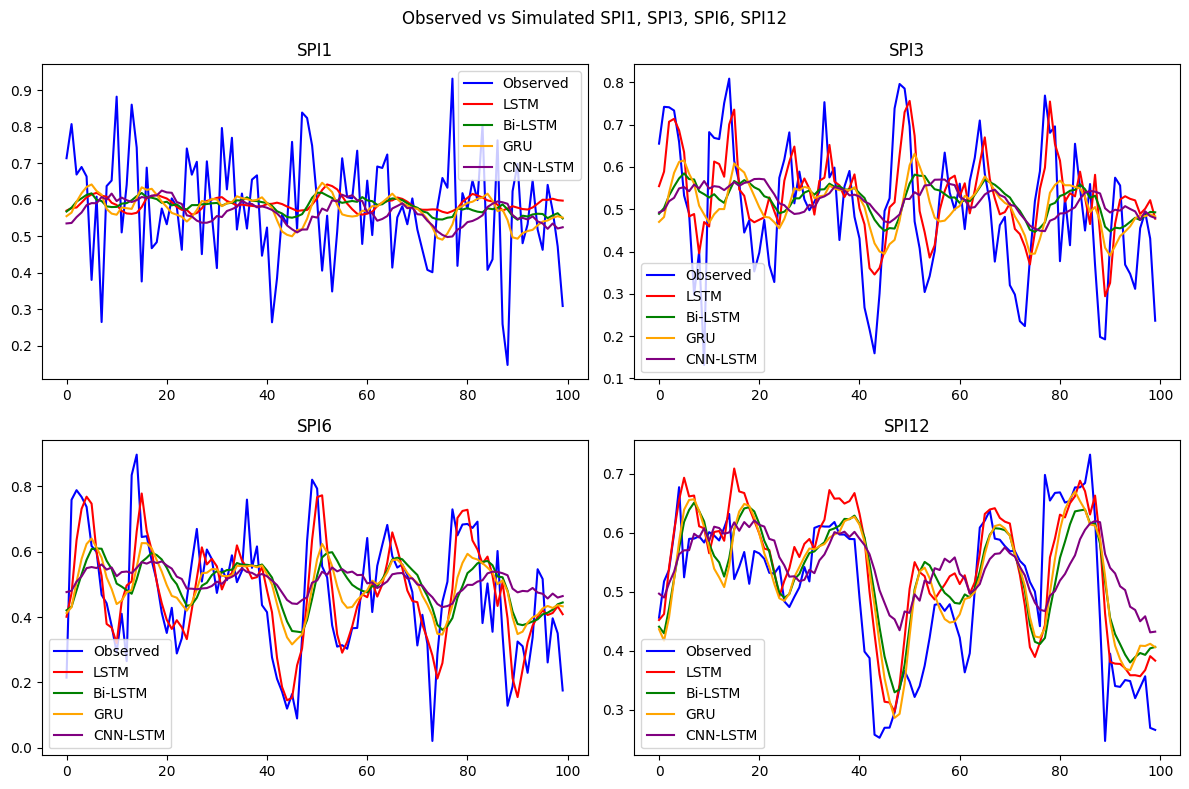

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot observed vs simulated for SPI indices
def plot_spi_comparison(observed, predicted_lstm, predicted_bi_lstm, predicted_gru, predicted_cnn_lstm, title):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(title)

    # SPI1
    axes[0, 0].plot(observed[:, 0], label='Observed', color='blue')
    axes[0, 0].plot(predicted_lstm[:, 0], label='LSTM', color='red')
    axes[0, 0].plot(predicted_bi_lstm[:, 0], label='Bi-LSTM', color='green')
    axes[0, 0].plot(predicted_gru[:, 0], label='GRU', color='orange')
    axes[0, 0].plot(predicted_cnn_lstm[:, 0], label='CNN-LSTM', color='purple')
    axes[0, 0].set_title('SPI1')
    axes[0, 0].legend()

    # SPI3
    axes[0, 1].plot(observed[:, 1], label='Observed', color='blue')
    axes[0, 1].plot(predicted_lstm[:, 1], label='LSTM', color='red')
    axes[0, 1].plot(predicted_bi_lstm[:, 1], label='Bi-LSTM', color='green')
    axes[0, 1].plot(predicted_gru[:, 1], label='GRU', color='orange')
    axes[0, 1].plot(predicted_cnn_lstm[:, 1], label='CNN-LSTM', color='purple')
    axes[0, 1].set_title('SPI3')
    axes[0, 1].legend()

    # SPI6
    axes[1, 0].plot(observed[:, 2], label='Observed', color='blue')
    axes[1, 0].plot(predicted_lstm[:, 2], label='LSTM', color='red')
    axes[1, 0].plot(predicted_bi_lstm[:, 2], label='Bi-LSTM', color='green')
    axes[1, 0].plot(predicted_gru[:, 2], label='GRU', color='orange')
    axes[1, 0].plot(predicted_cnn_lstm[:, 2], label='CNN-LSTM', color='purple')
    axes[1, 0].set_title('SPI6')
    axes[1, 0].legend()

    # SPI12
    axes[1, 1].plot(observed[:, 3], label='Observed', color='blue')
    axes[1, 1].plot(predicted_lstm[:, 3], label='LSTM', color='red')
    axes[1, 1].plot(predicted_bi_lstm[:, 3], label='Bi-LSTM', color='green')
    axes[1, 1].plot(predicted_gru[:, 3], label='GRU', color='orange')
    axes[1, 1].plot(predicted_cnn_lstm[:, 3], label='CNN-LSTM', color='purple')
    axes[1, 1].set_title('SPI12')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function after each model prediction
plot_spi_comparison(y_test, y_pred_lstm, y_pred_bi_lstm, y_pred_gru, y_pred_cnn_lstm, 'Observed vs Simulated SPI1, SPI3, SPI6, SPI12')


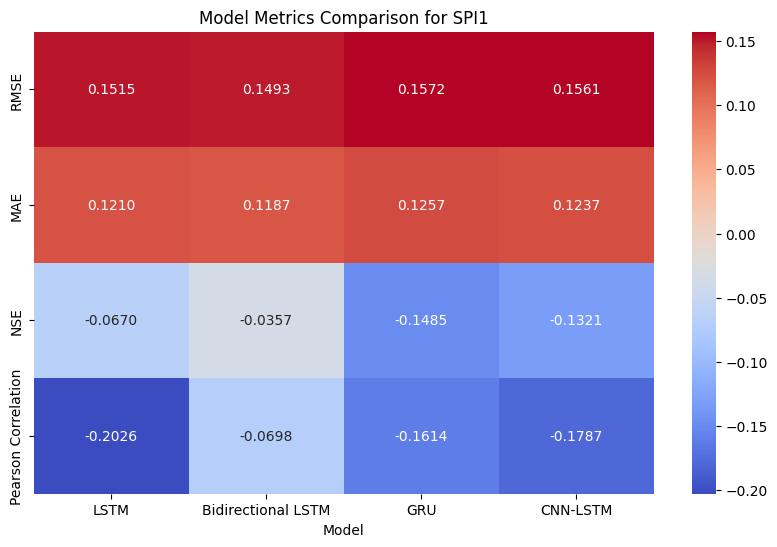

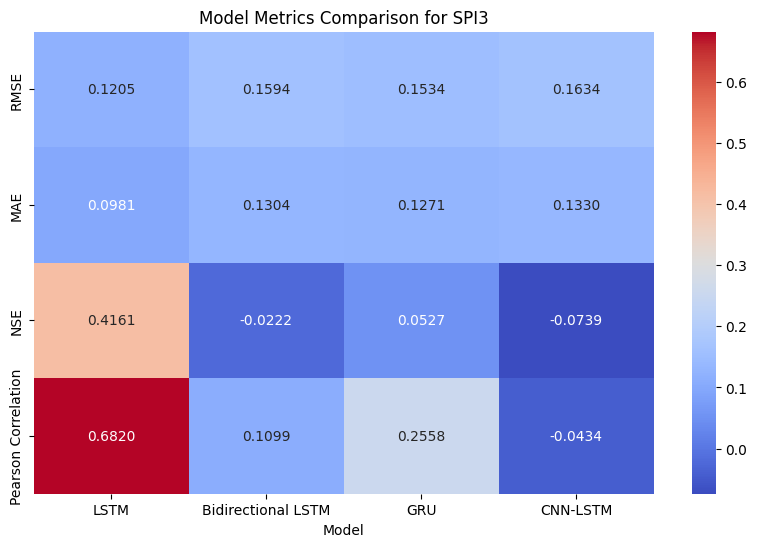

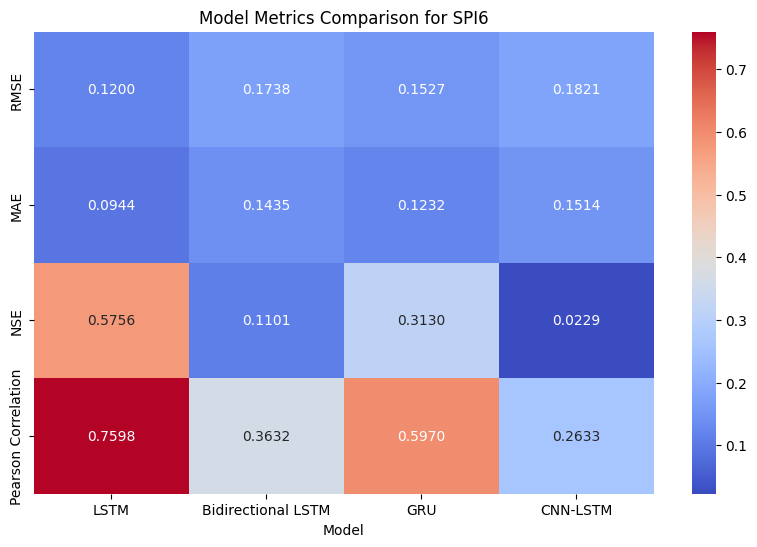

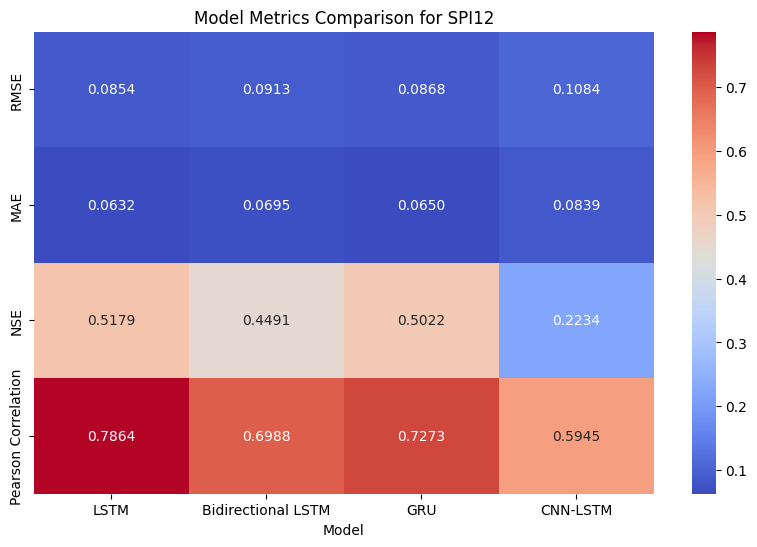

In [ ]:
# Assuming y_test and predictions (y_pred_lstm, y_pred_bi_lstm, y_pred_gru, y_pred_cnn_lstm) are available

# Function to calculate metrics for each SPI index separately
def calculate_spi_metrics_per_index(y_true, y_pred_lstm, y_pred_bi_lstm, y_pred_gru, y_pred_cnn_lstm):
    spi_metrics = {'SPI1': [], 'SPI3': [], 'SPI6': [], 'SPI12': []}

    for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
        metrics = {
            'Model': ['LSTM', 'Bidirectional LSTM', 'GRU', 'CNN-LSTM'],
            'RMSE': [
                np.sqrt(mean_squared_error(y_true[:, i], y_pred_lstm[:, i])),
                np.sqrt(mean_squared_error(y_true[:, i], y_pred_bi_lstm[:, i])),
                np.sqrt(mean_squared_error(y_true[:, i], y_pred_gru[:, i])),
                np.sqrt(mean_squared_error(y_true[:, i], y_pred_cnn_lstm[:, i]))
            ],
            'MAE': [
                mean_absolute_error(y_true[:, i], y_pred_lstm[:, i]),
                mean_absolute_error(y_true[:, i], y_pred_bi_lstm[:, i]),
                mean_absolute_error(y_true[:, i], y_pred_gru[:, i]),
                mean_absolute_error(y_true[:, i], y_pred_cnn_lstm[:, i])
            ],
            'NSE': [
                nash_sutcliffe_efficiency(y_true[:, i], y_pred_lstm[:, i]),
                nash_sutcliffe_efficiency(y_true[:, i], y_pred_bi_lstm[:, i]),
                nash_sutcliffe_efficiency(y_true[:, i], y_pred_gru[:, i]),
                nash_sutcliffe_efficiency(y_true[:, i], y_pred_cnn_lstm[:, i])
            ],
            'Pearson Correlation': [
                pearsonr(y_true[:, i], y_pred_lstm[:, i])[0],
                pearsonr(y_true[:, i], y_pred_bi_lstm[:, i])[0],
                pearsonr(y_true[:, i], y_pred_gru[:, i])[0],
                pearsonr(y_true[:, i], y_pred_cnn_lstm[:, i])[0]
            ]
        }
        spi_metrics[spi] = pd.DataFrame(metrics)

    return spi_metrics

# Generate metrics for SPI1, SPI3, SPI6, and SPI12
spi_metrics = calculate_spi_metrics_per_index(y_test, y_pred_lstm, y_pred_bi_lstm, y_pred_gru, y_pred_cnn_lstm)

# Plotting heatmaps for each SPI
for spi_index, metrics_df in spi_metrics.items():
    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics_df.set_index('Model').T, annot=True, cmap='coolwarm', fmt='.4f')
    plt.title(f'Model Metrics Comparison for {spi_index}')
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping

# Define evaluation metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true.flatten(), y_pred.flatten())
    return rmse, mae, pearson_corr

# Time series data structure
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

# Define LSTM model
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(50, return_sequences=True)(inputs)
    x = LSTM(50)(x)
    x = Dropout(0.2)(x)
    outputs = Dense(input_shape[1])(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Load and prepare the data (Assuming SPI_Data is loaded)
date_column = SPI_Data['Year-Month']
numeric_data = SPI_Data.drop(columns=['Year-Month'])
numeric_data = numeric_data.ffill().bfill()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(numeric_data.values)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns, index=SPI_Data.index)

time_step = 12
scaled_values = scaled_df.values
X, y = create_dataset(scaled_values, time_step)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train LSTM model
lstm_model = build_lstm_model((time_step, X_train.shape[2]))
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
lstm_features_train = lstm_model.predict(X_train)
lstm_features_test = lstm_model.predict(X_test)

# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(lstm_features_train, y_train.flatten())

# Make predictions
svr_predictions = svr_model.predict(lstm_features_test)

# Evaluate model
rmse, mae, pearson_corr = calculate_metrics(y_test.flatten(), svr_predictions)
print(f'SVR with LSTM Features Performance:')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'Pearson Correlation: {pearson_corr:.4f}')


In [ ]:
import os
import pandas as pd
import numpy as np
import pickle
import pmdarima as pm

# Read SPI data
SPI_Data = pd.read_csv(os.path.join(My_dir, 'Input', 'SPI_Data.csv'))

# Check column names
print("Columns in SPI_Data:", SPI_Data.columns)

# Ensure 'Date' column is in datetime format
SPI_Data['Date'] = pd.to_datetime(SPI_Data['Year-Month'])

# Prepare data for ARIMA models
SPI_ARIMA = SPI_Data.copy()
SPI_ARIMA = SPI_ARIMA.set_index('Date', drop=True)
SPI_ARIMA = SPI_ARIMA.dropna()

# Check and handle missing SPI columns
missing_columns = ['SPI1', 'SPI3', 'SPI6', 'SPI12']
for col in missing_columns:
    if col not in SPI_ARIMA.columns:
        print(f"Warning: Column {col} is missing from SPI_Data.")

# Generate and save ARIMA models for existing SPI columns
models = {}
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    if spi in SPI_ARIMA.columns:
        model = pm.auto_arima(SPI_ARIMA[spi], start_p=1, start_q=1, test='adf', max_p=3, max_q=3, m=1, d=None, seasonal=False,
                               start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
        models[spi] = model
        pickle.dump(model, open(os.path.join(sav_dif_dir, f'{spi}_ARIMA_Forecaster.sav'), 'wb'))
    else:
        print(f"Skipping ARIMA model generation for {spi} because it is missing in SPI_Data.")

# Define the number of months to forecast
n_periods = 12

# Define directories for models and forecasts
model_dir = sav_dif_dir
output_dir = os.path.join(My_dir, 'Input')
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Load the SPI data
spi_data = pd.read_csv(os.path.join(My_dir, 'Input', 'SPI Data.csv'))

forecast_combined = pd.DataFrame()  # Initialize an empty DataFrame to store combined forecasts

for n in [1, 3, 6, 12]:
    spi_col = f'SPI{n}'
    if spi_col in models:
        # Load the model from disk
        loaded_model = pickle.load(open(os.path.join(model_dir, f'{spi_col}_ARIMA_Forecaster.sav'), 'rb'))
        # Forecast
        fc, confint = loaded_model.predict(n_periods=n_periods, return_conf_int=True)
        forecast_df = pd.DataFrame(fc, columns=[spi_col])
        # Get the date of the first month of the forecast
        xx = pd.date_range(start=spi_data['Date'].iloc[-1], periods=2, freq=pd.DateOffset(months=1, day=1))
        forecast_df['Date'] = pd.date_range(start=xx[1], periods=len(forecast_df), freq=pd.DateOffset(months=1, day=1))
        forecast_df = forecast_df.set_index('Date', drop=True)
        # Concatenate forecast_df with forecast_combined
        forecast_combined = pd.concat([forecast_combined, forecast_df], axis=1)
    else:
        print(f"Skipping forecast generation for {spi_col} because its model is not available.")

# Save the combined forecast to a single CSV file
forecast_combined.to_csv(os.path.join(output_dir, 'SPI1_SPI3_SPI6_SPI12_Forecast.csv'), index=True)

Columns in SPI_Data: Index(['Year-Month', 'SPI1', 'SPI3', 'SPI6', 'SPI12'], dtype='object')
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1306.866, Time=1.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1304.428, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1305.200, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1305.242, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1300.699, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1301.950, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1301.961, Time=1.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1303.872, Time=1.92 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 7.259 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1128.827, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1369.482, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1129.983, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0

In [ ]:
forecast_combined

SPI1      SPI3      SPI6     SPI12
Date                                              
2023-11-01  0.095001 -1.268649 -1.472608 -1.219211
2023-12-01  0.095001 -0.470683 -1.104930 -1.177012
2024-01-01  0.095001  0.000000 -0.853310 -1.200679
2024-02-01  0.095001  0.000000 -0.631133 -1.247008
2024-03-01  0.095001  0.000000 -0.489735 -1.277884
2024-04-01  0.095001  0.000000 -0.361063 -1.266069
2024-05-01  0.095001  0.000000 -0.281034 -1.198284
2024-06-01  0.095001  0.000000 -0.206532 -1.075425
2024-07-01  0.095001  0.000000 -0.161299 -0.910228
2024-08-01  0.095001  0.000000 -0.118115 -0.723161
2024-09-01  0.095001  0.000000 -0.092596 -0.537505
2024-10-01  0.095001  0.000000 -0.067534 -0.374619

In [ ]:
import os
import pandas as pd
import numpy as np
import pickle
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from standard_precip import spi
#from climate_indices import compute, indices


# Define the base directory
base_dir = r"/content/drive/MyDrive/CDI03 code"
My_dir = base_dir

# Create directories for different outputs
output_dir = os.path.join(base_dir, "Output")
sav_dif_dir = os.path.join(base_dir, "SAV DIF Outputs")
spei_dir = os.path.join(sav_dif_dir, "SPEI")

# Check if directories exist, if not, create them
for directory in [output_dir, sav_dif_dir, spei_dir]:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# Read rainfall data for SPI
spi_ = pd.read_excel(os.path.join(My_dir, 'Input', 'Rajshahi_spi.xlsx'))

# Create copies of the data
DF1 = spi_.copy()

# Clean the data
DF1 = DF1.replace('MSD', np.nan)  # Replace missing values (MSD) with NaN

# SPI calculation portion
# This block of code gets the data for each station and then calculates SPI 1, 3, 6, and 12 from the starting point for each station
spi_rain = spi.SPI()  # Call spi module to calculate SPI data
station = DF1[['Date', 'Rainfall']]  # Get the data of each station

# Ensure 'Date' is in datetime format
station['Date'] = pd.to_datetime(station['Date'])

# Calculate SPI1
sp1 = station.copy()
sp1['Year-Month'] = sp1['Date'].dt.strftime('%Y-%m')  # Extract year and month
sp1 = sp1.groupby('Year-Month')['Rainfall'].sum().reset_index()  # Sum the rainfall for each month
sp1 = spi_rain.calculate(sp1, 'Year-Month', 'Rainfall', freq="M", scale=1, fit_type="lmom", dist_type="gam")  # Calculate SPI1
SPI1 = sp1.rename(columns={sp1.columns[2]: 'SPI1'})  # Rename the SPI1 column

# Calculate SPI3
sp3 = station.copy()
sp3['Year-Month'] = sp3['Date'].dt.strftime('%Y-%m')
sp3 = sp3.groupby('Year-Month')['Rainfall'].sum().reset_index()
sp3 = spi_rain.calculate(sp3, 'Year-Month', 'Rainfall', freq="M", scale=3, fit_type="lmom", dist_type="gam")  # Calculate SPI3
SPI3 = sp3.rename(columns={sp3.columns[2]: 'SPI3'})  # Rename the SPI3 column

# Calculate SPI6
sp6 = station.copy()
sp6['Year-Month'] = sp6['Date'].dt.strftime('%Y-%m')
sp6 = sp6.groupby('Year-Month')['Rainfall'].sum().reset_index()
sp6 = spi_rain.calculate(sp6, 'Year-Month', 'Rainfall', freq="M", scale=6, fit_type="lmom", dist_type="gam")  # Calculate SPI6
SPI6 = sp6.rename(columns={sp6.columns[2]: 'SPI6'})  # Rename the SPI6 column

# Calculate SPI12
sp12 = station.copy()
sp12['Year-Month'] = sp12['Date'].dt.strftime('%Y-%m')
sp12 = sp12.groupby('Year-Month')['Rainfall'].sum().reset_index()
sp12 = spi_rain.calculate(sp12, 'Year-Month', 'Rainfall', freq="M", scale=12, fit_type="lmom", dist_type="gam")  # Calculate SPI12
SPI12 = sp12.rename(columns={sp12.columns[2]: 'SPI12'})  # Rename the SPI12 column

# Combine SPI1, SPI3, SPI6, and SPI12 data
SPI_Data = pd.concat([SPI1[['Year-Month', 'SPI1']], SPI3[['SPI3']], SPI6[['SPI6']], SPI12[['SPI12']]], axis=1)

# Ensure 'Date' column is in datetime format and set frequency
SPI_Data['Date'] = pd.to_datetime(SPI_Data['Year-Month'])
SPI_Data = SPI_Data.set_index('Date')
SPI_Data.index = SPI_Data.index.to_period('M').to_timestamp()

# Remove any rows with missing data
SPI_ARIMA = SPI_Data.dropna()

# Generate and save Exponential Smoothing models
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    if spi in SPI_ARIMA.columns:
        model = ExponentialSmoothing(SPI_ARIMA[spi], seasonal='add', seasonal_periods=12).fit()
        pickle.dump(model, open(os.path.join(model_dir, f'{spi}_ETS_Forecaster.sav'), 'wb'))
    else:
        print(f"Skipping Exponential Smoothing model generation for {spi} because it is missing in SPI_Data.")

# Define the number of months to forecast
n_periods = 12  # Fixed number of periods
forecast_combined = pd.DataFrame()  # Initialize an empty DataFrame to store combined forecasts

# Generate forecasts
for n in [1, 3, 6, 12]:
    spi_col = f'SPI{n}'
    if os.path.exists(os.path.join(model_dir, f'{spi_col}_ETS_Forecaster.sav')):
        # Load the model from disk
        loaded_model = pickle.load(open(os.path.join(model_dir, f'{spi_col}_ETS_Forecaster.sav'), 'rb'))
        # Forecast
        fc = loaded_model.forecast(steps=n_periods)
        forecast_df = pd.DataFrame(fc, columns=[spi_col])
        # Get the date of the first month of the forecast
        xx = pd.date_range(start=SPI_Data.index[-1], periods=2, freq='MS')
        forecast_df['Date'] = pd.date_range(start=xx[1], periods=len(forecast_df), freq='MS')
        forecast_df = forecast_df.set_index('Date', drop=True)
        # Concatenate forecast_df with forecast_combined
        forecast_combined = pd.concat([forecast_combined, forecast_df], axis=1)
    else:
        print(f"Skipping forecast generation for {spi_col} because its model is not available.")

# Save the combined forecast to a single CSV file
forecast_combined.to_csv(os.path.join(output_dir, 'SPI_Forecast.csv'), index=True)
forecast_combined

SPI1      SPI3      SPI6     SPI12
Date                                              
2023-08-01 -0.064169 -2.083260 -1.968002 -1.394694
2023-09-01 -0.069572 -2.106062 -1.967795 -1.391449
2023-10-01 -0.002865 -2.065175 -1.942833 -1.383233
2023-11-01  0.253871 -2.046004 -1.923662 -1.374796
2023-12-01  0.460435 -2.053519 -1.925736 -1.426771
2024-01-01  0.163247 -1.966109 -1.916646 -1.418439
2024-02-01  0.064743 -1.987133 -1.907184 -1.411090
2024-03-01  0.034408 -2.053802 -1.904719 -1.402947
2024-04-01 -0.090154 -2.076389 -1.904416 -1.395083
2024-05-01 -0.109443 -2.072683 -1.882358 -1.386206
2024-06-01 -0.036013 -2.054611 -1.932555 -1.378699
2024-07-01 -0.101461 -2.048294 -1.931992 -1.367894

In [ ]:
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the directory where the models are saved
model_dir = os.path.join(base_dir, "SAV DIF Outputs")

# Load the models
models = {}
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    model_path = os.path.join(model_dir, f'{spi}_ETS_Forecaster.sav')
    if os.path.isfile(model_path):
        models[spi] = pickle.load(open(model_path, 'rb'))
        print(f"Model for {spi} loaded successfully.")
    else:
        print(f"Model for {spi} not found at {model_path}.")

# Generate simulated SPI values using the Exponential Smoothing models
simulated_spi = {}
for spi, model in models.items():
    if spi in SPI_Data.columns:
        simulated_spi[spi] = model.fittedvalues
    else:
        print(f"Cannot generate simulated SPI values for {spi} as it is not in SPI_Data.")

def calculate_nse(observed, simulated):
    mean_observed = np.mean(observed)
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - mean_observed) ** 2))

metrics = {}
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    if spi in simulated_spi and spi in SPI_Data.columns:
        observed = SPI_Data[spi].dropna()
        simulated = simulated_spi[spi].reindex(observed.index)  # Align the indices

        # Drop rows with NaN values in either observed or simulated data
        valid_data = observed.notna() & simulated.notna()
        observed = observed[valid_data]
        simulated = simulated[valid_data]

        rmse = np.sqrt(mean_squared_error(observed, simulated))
        mae = mean_absolute_error(observed, simulated)
        nse = calculate_nse(observed, simulated)

        metrics[spi] = {
            'RMSE': rmse,
            'MAE': mae,
            'NSE': nse
        }

# Print the metrics
for spi, metric in metrics.items():
    print(f"{spi} - RMSE: {metric['RMSE']:.4f}, MAE: {metric['MAE']:.4f}, NSE: {metric['NSE']:.4f}")


Model for SPI1 loaded successfully.
Model for SPI3 loaded successfully.
Model for SPI6 loaded successfully.
Model for SPI12 loaded successfully.
SPI1 - RMSE: 0.8698, MAE: 0.6976, NSE: 0.0339
SPI3 - RMSE: 0.8207, MAE: 0.6446, NSE: 0.2532
SPI6 - RMSE: 0.7094, MAE: 0.5247, NSE: 0.4579
SPI12 - RMSE: 0.4075, MAE: 0.2584, NSE: 0.8325


Model for SPI1 loaded successfully.
Model for SPI3 loaded successfully.
Model for SPI6 loaded successfully.
Model for SPI12 loaded successfully.


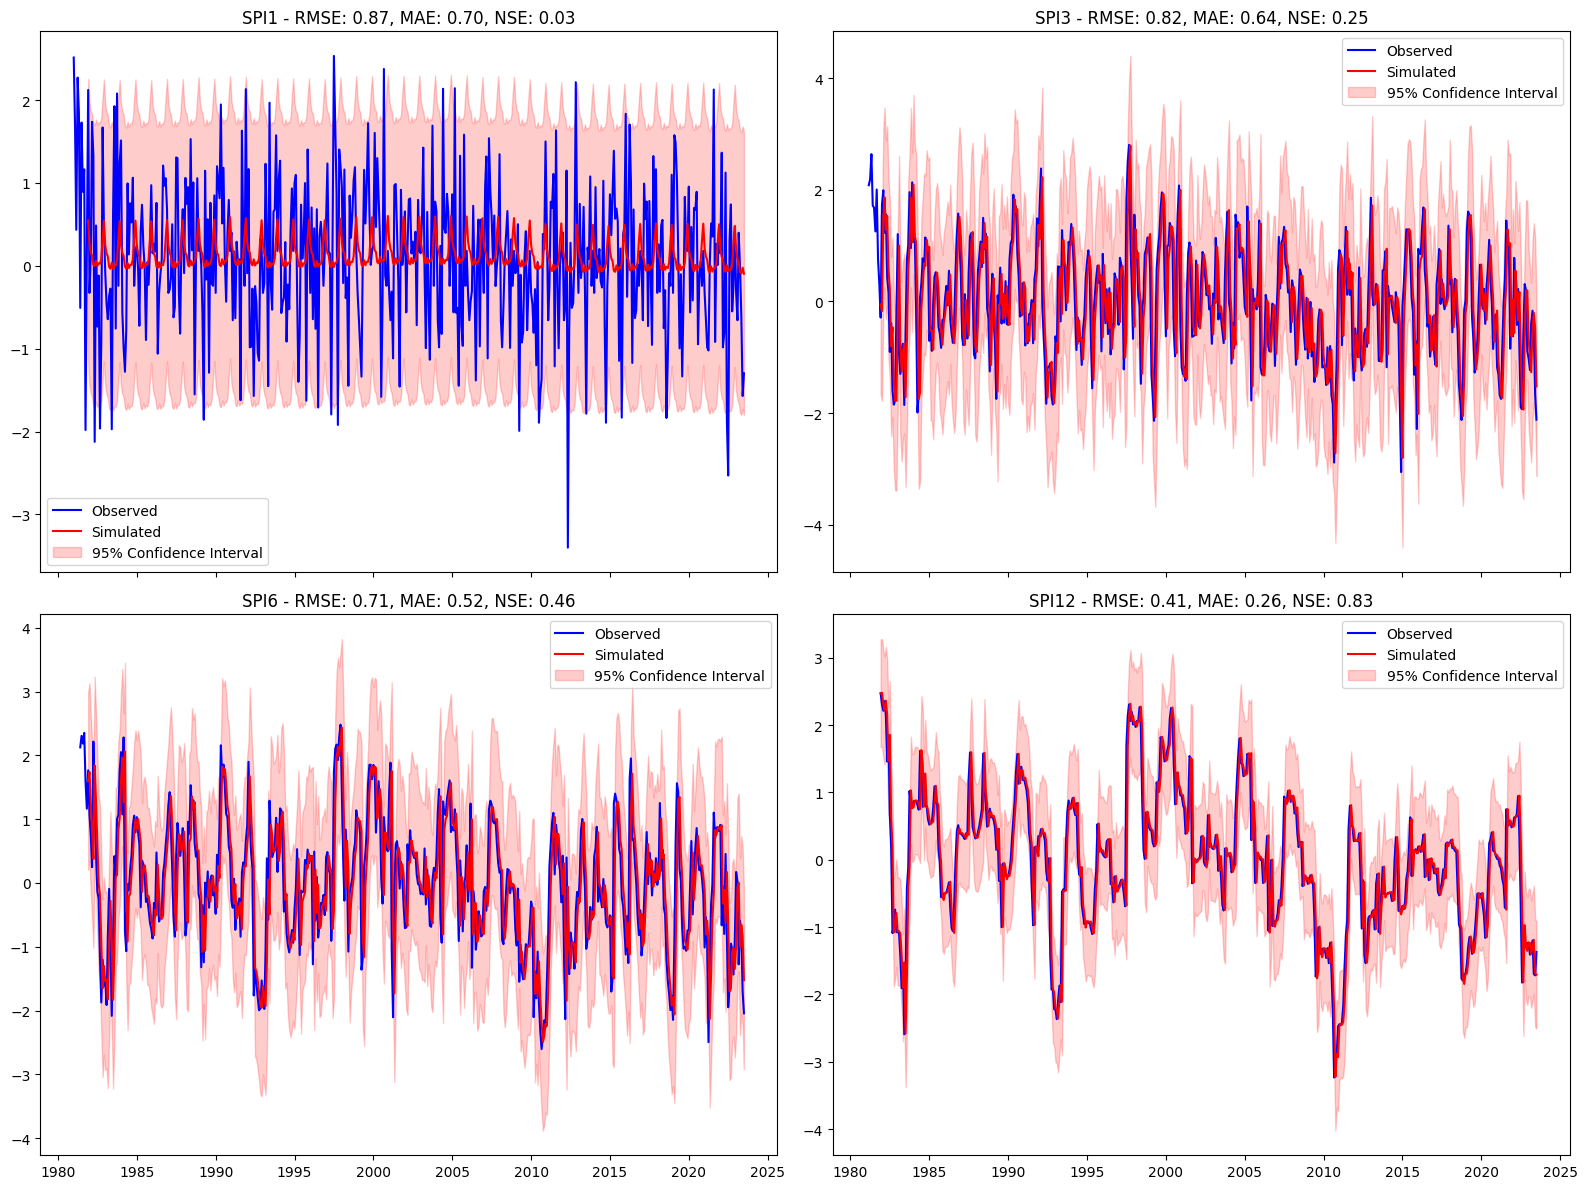

In [ ]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from standard_precip import spi
# Define the base directory
base_dir = r"/content/drive/MyDrive/CDI03 code"
My_dir = base_dir

# Create directories for different outputs
output_dir = os.path.join(base_dir, "Output")
sav_dif_dir = os.path.join(base_dir, "SAV DIF Outputs")
spei_dir = os.path.join(sav_dif_dir, "SPEI")

# Check if directories exist, if not, create them
for directory in [output_dir, sav_dif_dir, spei_dir]:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# Read rainfall data for SPI
spi_ = pd.read_excel(os.path.join(My_dir, 'Input', 'Rajshahi_spi.xlsx'))

# Create copies of the data
DF1 = spi_.copy()

# Clean the data
DF1 = DF1.replace('MSD', np.nan)  # Replace missing values (MSD) with NaN

# SPI calculation portion
spi_rain = spi.SPI()  # Call spi module to calculate SPI data
station = DF1[['Date', 'Rainfall']]  # Get the data of each station

# Ensure 'Date' is in datetime format
station['Date'] = pd.to_datetime(station['Date'])

# Calculate SPI1
sp1 = station.copy()
sp1['Year-Month'] = sp1['Date'].dt.strftime('%Y-%m')  # Extract year and month
sp1 = sp1.groupby('Year-Month')['Rainfall'].sum().reset_index()  # Sum the rainfall for each month
sp1 = spi_rain.calculate(sp1, 'Year-Month', 'Rainfall', freq="M", scale=1, fit_type="lmom", dist_type="gam")  # Calculate SPI1
SPI1 = sp1.rename(columns={sp1.columns[2]: 'SPI1'})  # Rename the SPI1 column

# Calculate SPI3
sp3 = station.copy()
sp3['Year-Month'] = sp3['Date'].dt.strftime('%Y-%m')
sp3 = sp3.groupby('Year-Month')['Rainfall'].sum().reset_index()
sp3 = spi_rain.calculate(sp3, 'Year-Month', 'Rainfall', freq="M", scale=3, fit_type="lmom", dist_type="gam")  # Calculate SPI3
SPI3 = sp3.rename(columns={sp3.columns[2]: 'SPI3'})  # Rename the SPI3 column

# Calculate SPI6
sp6 = station.copy()
sp6['Year-Month'] = sp6['Date'].dt.strftime('%Y-%m')
sp6 = sp6.groupby('Year-Month')['Rainfall'].sum().reset_index()
sp6 = spi_rain.calculate(sp6, 'Year-Month', 'Rainfall', freq="M", scale=6, fit_type="lmom", dist_type="gam")  # Calculate SPI6
SPI6 = sp6.rename(columns={sp6.columns[2]: 'SPI6'})  # Rename the SPI6 column

# Calculate SPI12
sp12 = station.copy()
sp12['Year-Month'] = sp12['Date'].dt.strftime('%Y-%m')
sp12 = sp12.groupby('Year-Month')['Rainfall'].sum().reset_index()
sp12 = spi_rain.calculate(sp12, 'Year-Month', 'Rainfall', freq="M", scale=12, fit_type="lmom", dist_type="gam")  # Calculate SPI12
SPI12 = sp12.rename(columns={sp12.columns[2]: 'SPI12'})  # Rename the SPI12 column

# Combine SPI1, SPI3, SPI6, and SPI12 data
SPI_Data = pd.concat([SPI1[['Year-Month', 'SPI1']], SPI3[['SPI3']], SPI6[['SPI6']], SPI12[['SPI12']]], axis=1)

# Ensure 'Date' column is in datetime format and set frequency
SPI_Data['Date'] = pd.to_datetime(SPI_Data['Year-Month'])
SPI_Data = SPI_Data.set_index('Date')
SPI_Data.index = SPI_Data.index.to_period('M').to_timestamp()

# Remove any rows with missing data
SPI_ARIMA = SPI_Data.dropna()

# Generate and save Exponential Smoothing models
model_dir = os.path.join(base_dir, "SAV DIF Outputs")
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    if spi in SPI_ARIMA.columns:
        model = ExponentialSmoothing(SPI_ARIMA[spi], seasonal='add', seasonal_periods=12).fit()
        pickle.dump(model, open(os.path.join(model_dir, f'{spi}_ETS_Forecaster.sav'), 'wb'))
    else:
        print(f"Skipping Exponential Smoothing model generation for {spi} because it is missing in SPI_Data.")

# Load the models
models = {}
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    model_path = os.path.join(model_dir, f'{spi}_ETS_Forecaster.sav')
    if os.path.isfile(model_path):
        models[spi] = pickle.load(open(model_path, 'rb'))
        print(f"Model for {spi} loaded successfully.")
    else:
        print(f"Model for {spi} not found at {model_path}.")

# Generate simulated SPI values using the Exponential Smoothing models
simulated_spi = {}
for spi, model in models.items():
    if spi in SPI_Data.columns:
        simulated_spi[spi] = model.fittedvalues
    else:
        print(f"Cannot generate simulated SPI values for {spi} as it is not in SPI_Data.")

def calculate_nse(observed, simulated):
    mean_observed = np.mean(observed)
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - mean_observed) ** 2))

metrics = {}
for spi in ['SPI1', 'SPI3', 'SPI6', 'SPI12']:
    if spi in simulated_spi and spi in SPI_Data.columns:
        observed = SPI_Data[spi].dropna()
        simulated = simulated_spi[spi].reindex(observed.index)  # Align the indices

        # Drop rows with NaN values in either observed or simulated data
        valid_data = observed.notna() & simulated.notna()
        observed = observed[valid_data]
        simulated = simulated[valid_data]

        rmse = np.sqrt(mean_squared_error(observed, simulated))
        mae = mean_absolute_error(observed, simulated)
        nse = calculate_nse(observed, simulated)

        metrics[spi] = {
            'RMSE': rmse,
            'MAE': mae,
            'NSE': nse
        }

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
axs = axs.flatten()

for i, spi in enumerate(['SPI1', 'SPI3', 'SPI6', 'SPI12']):
    ax = axs[i]
    observed = SPI_Data[spi].dropna()
    simulated = simulated_spi[spi].reindex(observed.index)

    # Calculate confidence intervals
    confidence_interval = 1.96 * np.std(simulated - observed)  # Assuming normal distribution

    ax.plot(observed.index, observed, label='Observed', color='blue')
    ax.plot(simulated.index, simulated, label='Simulated', color='red')
    ax.fill_between(observed.index,
                    simulated - confidence_interval,
                    simulated + confidence_interval,
                    color='red', alpha=0.2, label='95% Confidence Interval')

    # Add metrics to the title
    rmse = metrics[spi]['RMSE']
    mae = metrics[spi]['MAE']
    nse = metrics[spi]['NSE']
    ax.set_title(f'{spi} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, NSE: {nse:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

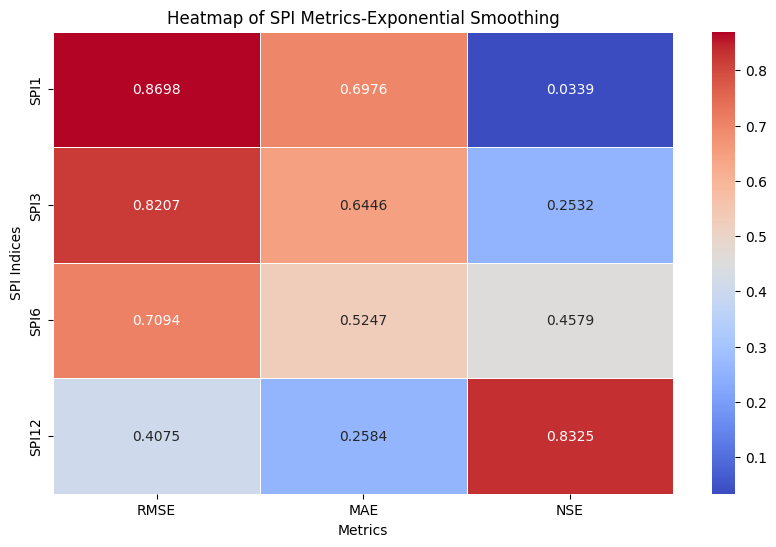

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame(metrics).T  # Transpose to have SPI indices as rows

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title('Heatmap of SPI Metrics-Exponential Smoothing')
plt.xlabel('Metrics')
plt.ylabel('SPI Indices')
plt.show()
